### **Step 1: Setup Google Colab and Load Dataset**

In [ ]:
# Install necessary libraries if not already installed
!pip install pandas numpy matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

# Mount Google Drive if using Google Colab
from google.colab import files
uploaded = files.upload()  # Upload your dataset file

# Load dataset
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_excel(file_name)

# Display dataset
print("Dataset Preview:")
print(df.head())
print("\nSummary:")
print(df.info())


Saving Expanded_Dataset.xlsx to Expanded_Dataset.xlsx
Dataset Preview:
   Patient_ID  Age  Gender  Condition  Symptom_Severity  Joint_Pain  Swelling  \
0           1   45       1          0                 3           1         1   
1           2   33       0          1                 2           0         0   
2           3   55       1          2                 1           0         0   
3           4   29       1          3                 3           0         0   
4           5   41       0          0                 2           1         0   

   Headache  Nausea  Stomach_Pain  Acid_Reflux  Shortness_of_Breath  Wheezing  \
0         0       0             0            0                    0         0   
1         1       1             0            0                    0         0   
2         0       0             1            0                    0         0   
3         0       0             0            0                    1         0   
4         0       0             0    

### **Step 2: Exploratory Data Analysis (EDA)**


Missing Values:
Patient_ID                 0
Age                        0
Gender                     0
Condition                  0
Symptom_Severity           0
Joint_Pain                 0
Swelling                   0
Headache                   0
Nausea                     0
Stomach_Pain               0
Acid_Reflux                0
Shortness_of_Breath        0
Wheezing                   0
Coughing                   0
Selected_Treatment         0
Treatment_Duration         0
Outcome_Score              0
Avg_Recovery_Time          0
Predicted_Recovery_Time    0
dtype: int64

Statistical Summary:
       Patient_ID        Age     Gender  Condition  Symptom_Severity  \
count   93.000000  93.000000  93.000000  93.000000         93.000000   
mean    47.000000  52.817204   0.483871   1.591398          2.118280   
std     26.990739  20.350700   0.502448   1.034582          0.818926   
min      1.000000  18.000000   0.000000   0.000000          1.000000   
25%     24.000000  36.000000   0.0000

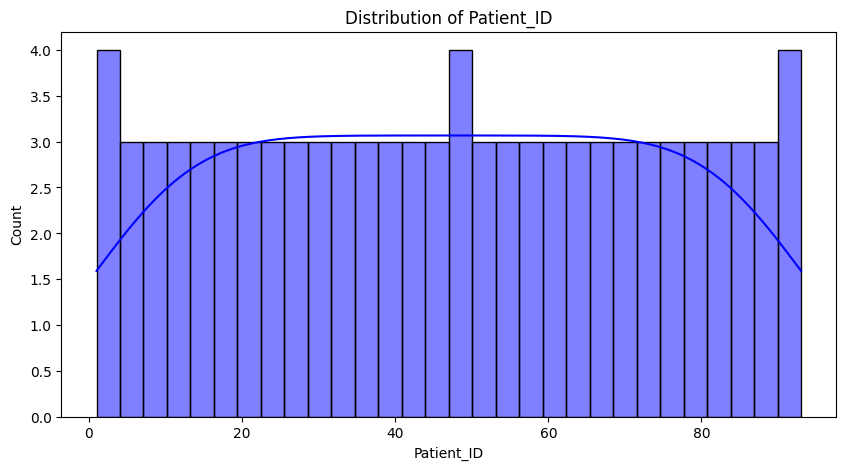

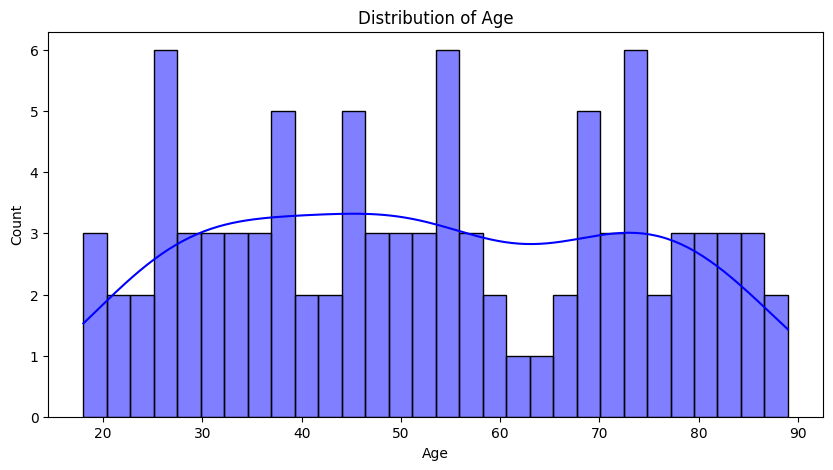

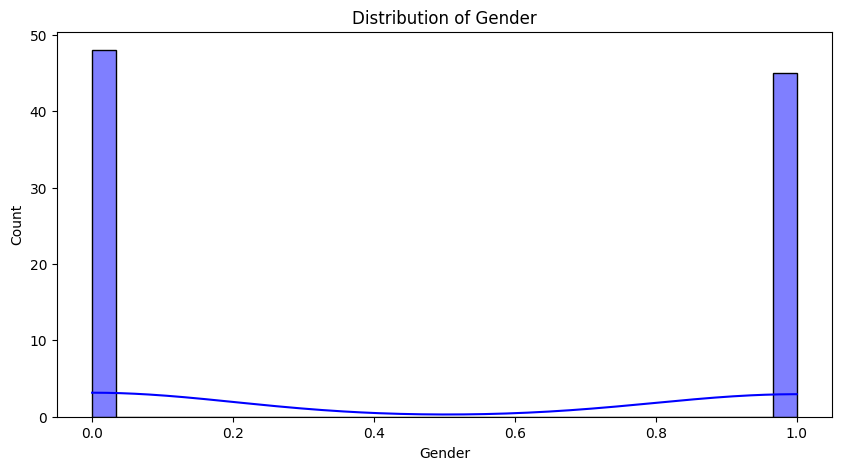

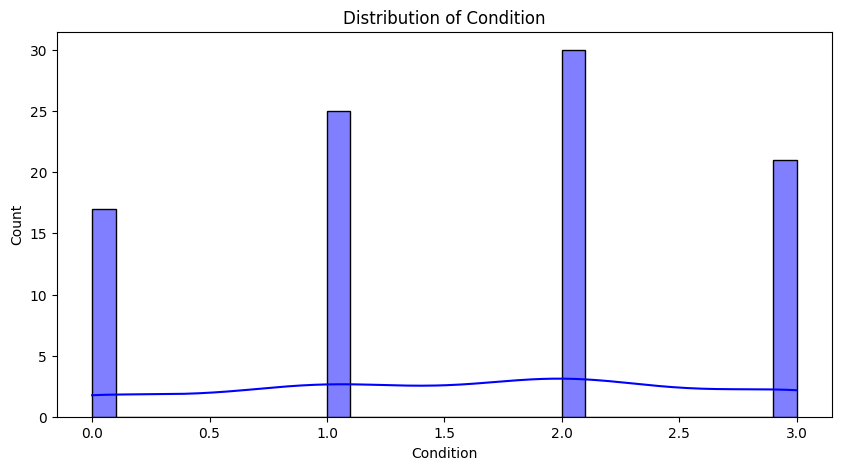

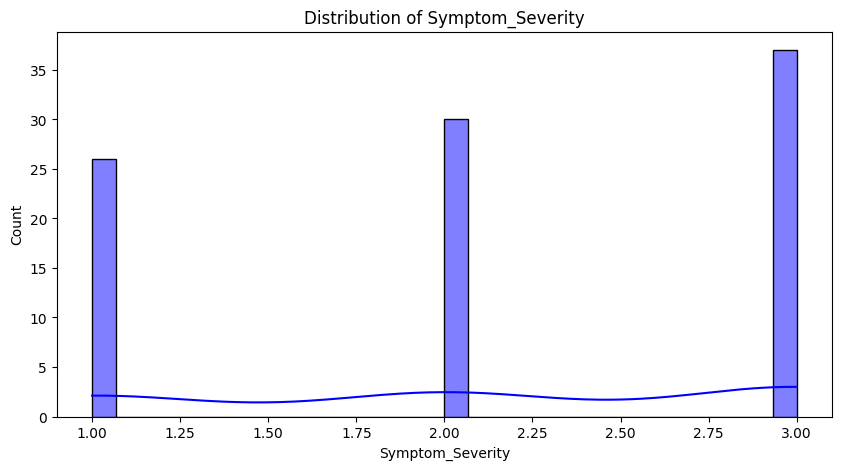

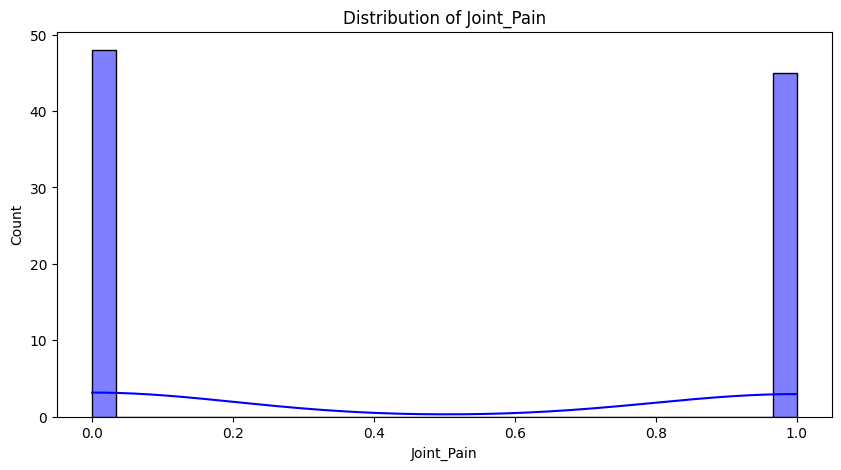

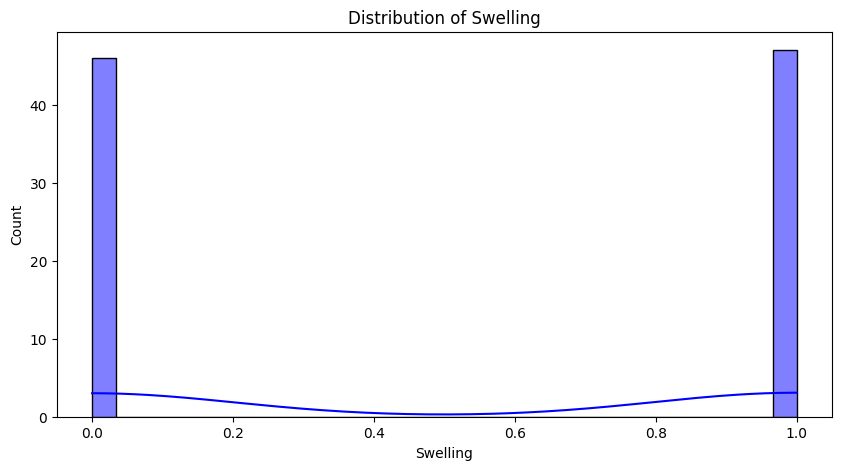

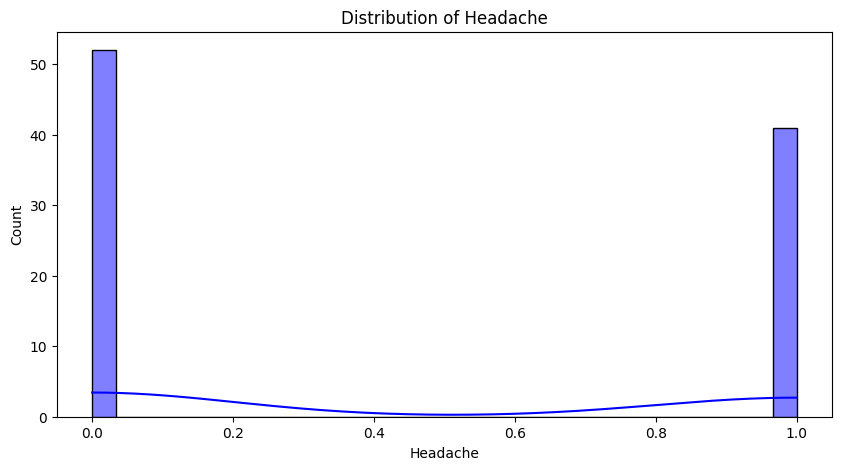

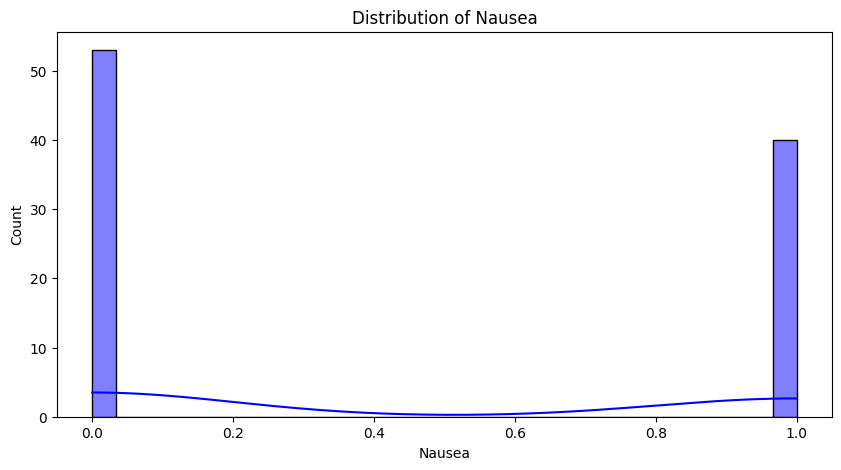

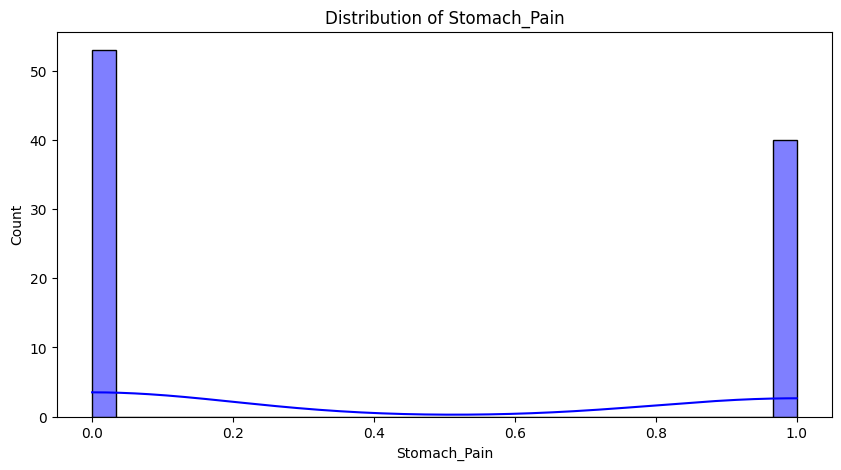

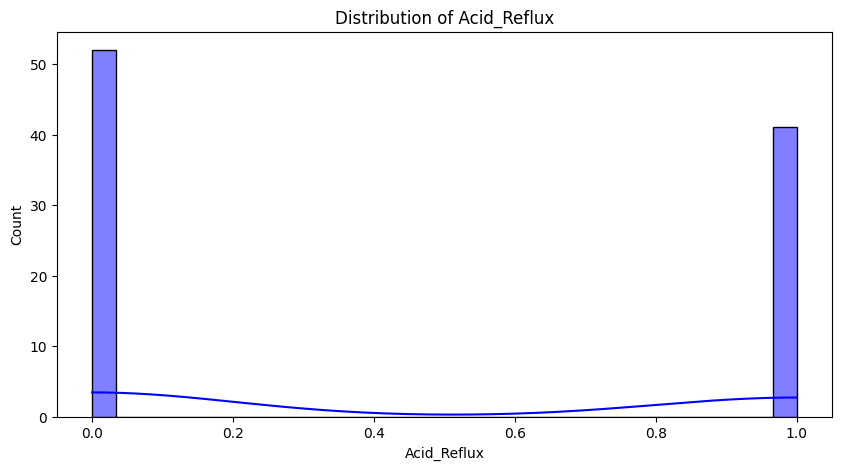

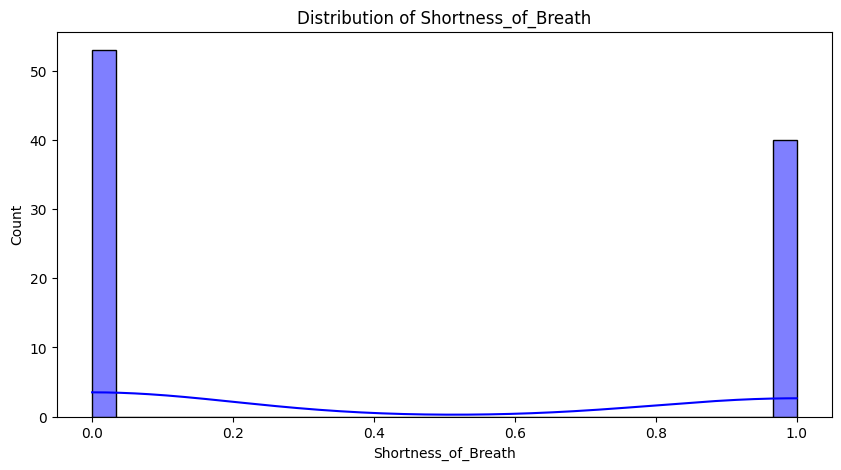

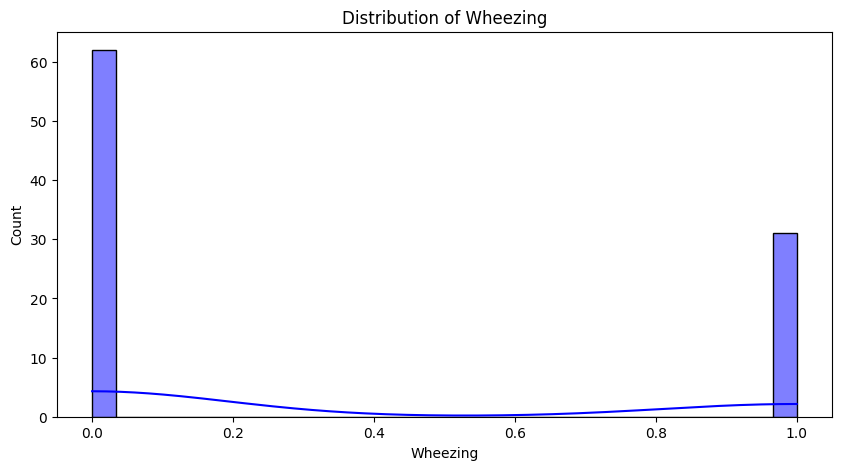

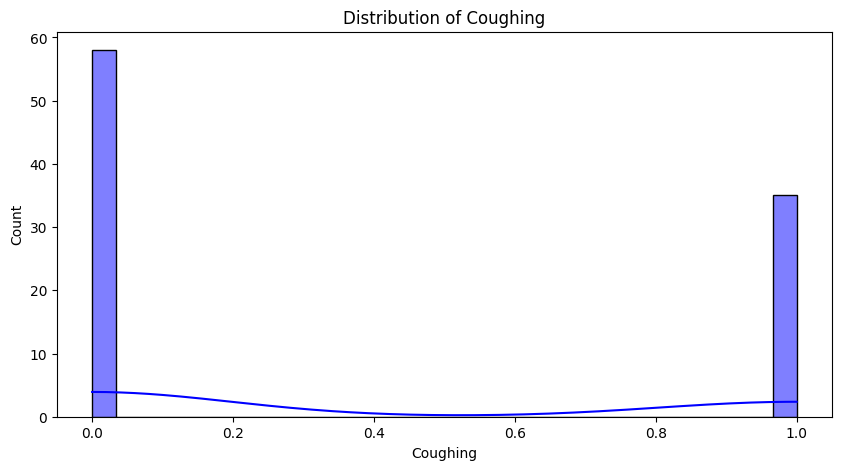

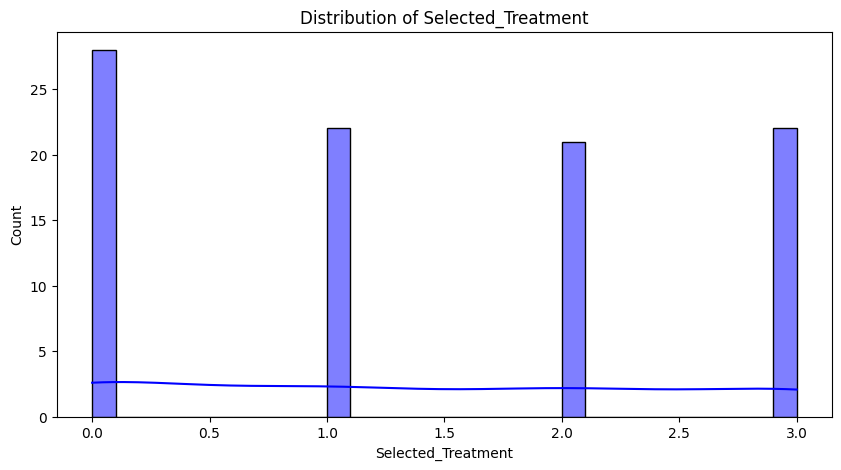

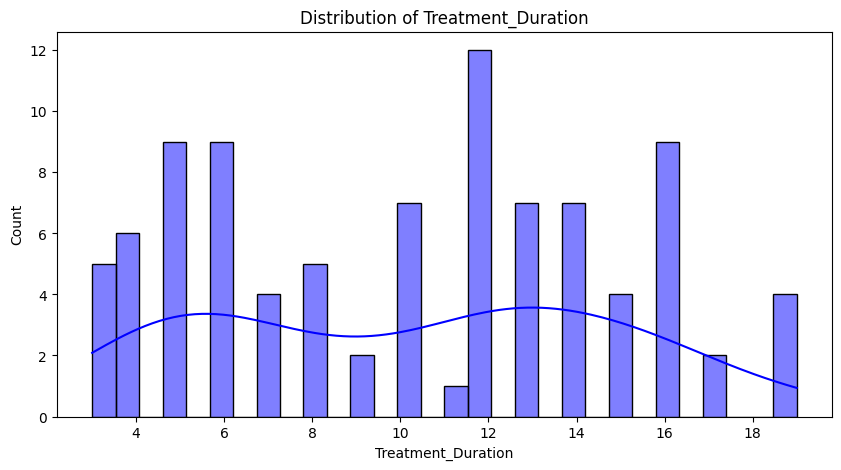

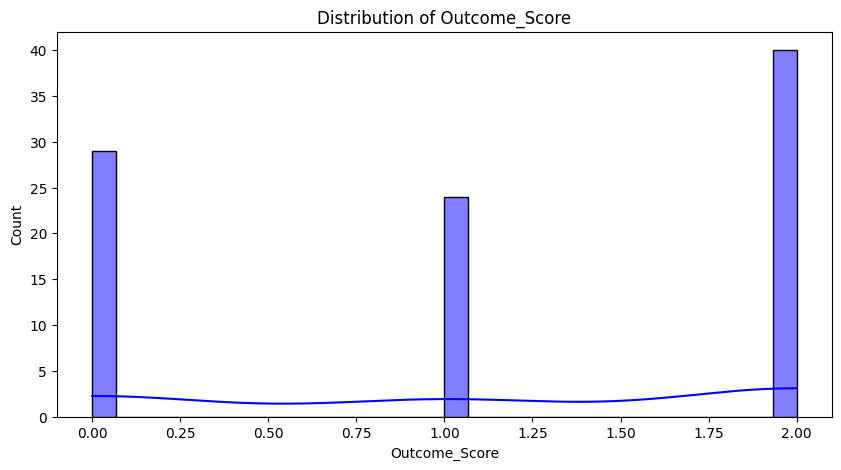

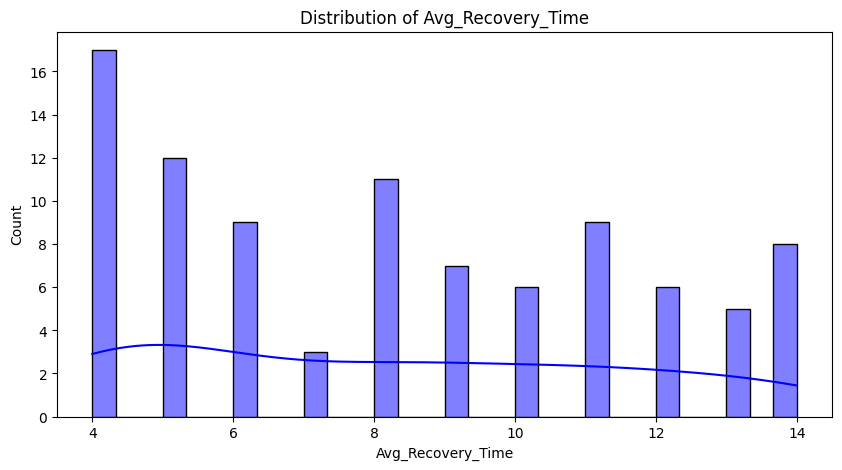

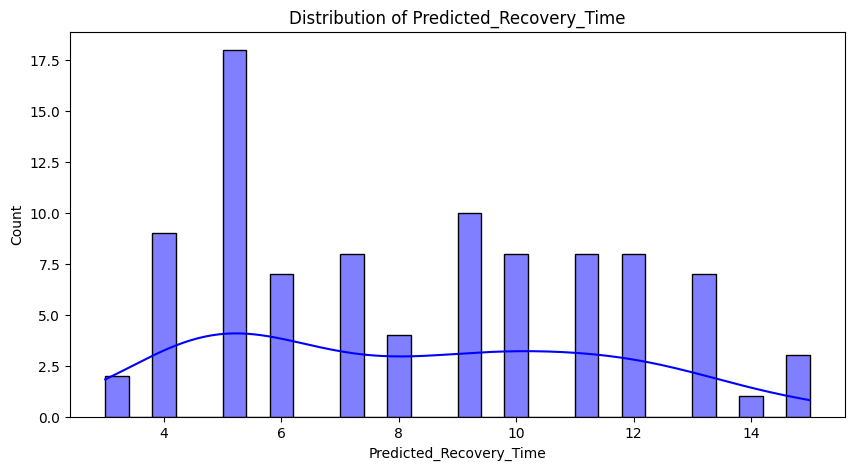

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nStatistical Summary:")
print(df.describe(include="all"))

# Visualize categorical and numerical features
categorical_columns = df.select_dtypes(include=["object"]).columns
numerical_columns = df.select_dtypes(include=["number"]).columns

# Plot categorical features
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Plot numerical features
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, kde=True, color="blue", bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


### **Step 3: Data Preprocessing**

In [ ]:
# Handling Missing Values
# Fill missing categorical values with mode
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill missing numerical values with median
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

# Encoding Categorical Variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature Scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Verify preprocessing
print("\nDataset After Preprocessing:")
print(df.head())



Dataset After Preprocessing:
   Patient_ID       Age    Gender  Condition  Symptom_Severity  Joint_Pain  \
0   -1.713526 -0.386207  1.032796  -1.546541          1.082514    1.032796   
1   -1.676275 -0.979063 -0.968246  -0.574728         -0.145215   -0.968246   
2   -1.639025  0.107840  1.032796   0.397085         -1.372945   -0.968246   
3   -1.601774 -1.176682  1.032796   1.368898          1.082514   -0.968246   
4   -1.564523 -0.583825 -0.968246  -1.546541         -0.145215    1.032796   

   Swelling  Headache    Nausea  Stomach_Pain  Acid_Reflux  \
0  0.989305 -0.887954 -0.868744     -0.868744    -0.887954   
1 -1.010811  1.126185  1.151086     -0.868744    -0.887954   
2 -1.010811 -0.887954 -0.868744      1.151086    -0.887954   
3 -1.010811 -0.887954 -0.868744     -0.868744    -0.887954   
4 -1.010811 -0.887954 -0.868744     -0.868744    -0.887954   

   Shortness_of_Breath  Wheezing  Coughing  Selected_Treatment  \
0            -0.868744 -0.707107 -0.776819           -1.219060

### **Step 4: Feature Selection**

In [ ]:
# Define the two target variables
target_1 = "Outcome_Score"
target_2 = "Predicted_Recovery_Time"

# Features (drop both targets from the features set)
X = df.drop(columns=[target_1, target_2], errors='ignore')  # Ignore if columns not found
y1 = df[target_1]  # Target 1
y2 = df[target_2]  # Target 2

# Drop redundant and low-impact features based on correlation analysis
# This line is moved BEFORE feature selection to ensure consistency:
# Check if columns exist before dropping to prevent KeyError
if "Patient_ID" in df.columns and "Avg_Recovery_Time" in df.columns:
    df = df.drop(columns=["Patient_ID", "Avg_Recovery_Time"])  # Drop Patient_ID and Avg_Recovery_Time
    X = X.drop(columns=["Patient_ID", "Avg_Recovery_Time"], errors='ignore')  # Also drop from X, ignore if not found

# Instead of StandardScaler, use MinMaxScaler to scale features to a range of [0, 1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Update numerical_columns to exclude target variables
numerical_columns = [col for col in numerical_columns if col not in [target_1, target_2]]

# Apply scaling to the updated numerical columns in X
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])


# Use f_regression for numerical targets (Outcome_Score and Predicted_Recovery_Time)
from sklearn.feature_selection import f_regression

# SelectKBest for Target 1: Outcome_Score
selector_y1 = SelectKBest(score_func=f_regression, k=5)  # Top 5 features for target 1
X_new_y1 = selector_y1.fit_transform(X, y1)  # Use the modified X
selected_features_y1 = X.columns[selector_y1.get_support()]  # Use the modified X's columns

print("\nSelected Features for Outcome_Score (Target 1):")
print(selected_features_y1)

# SelectKBest for Target 2: Predicted_Recovery_Time
selector_y2 = SelectKBest(score_func=f_regression, k=5)  # Top 5 features for target 2
X_new_y2 = selector_y2.fit_transform(X, y2)  # Use the modified X
selected_features_y2 = X.columns[selector_y2.get_support()]  # Use the modified X's columns

print("\nSelected Features for Predicted_Recovery_Time (Target 2):")
print(selected_features_y2)

# Combine Selected Features
selected_features_combined = list(set(selected_features_y1) | set(selected_features_y2))
print("\nCombined Selected Features for Both Targets:")
print(selected_features_combined)

# Filter the dataset to only include the selected features and the targets
X_selected = df[selected_features_combined]
print("\nDataset with Selected Features:")
print(X_selected.head())

KeyError: "['Patient_ID', 'Avg_Recovery_Time'] not in index"

### **Step 1: Setup Google Colab and Load Dataset**

In [ ]:
# Install necessary libraries if not already installed
!pip install pandas numpy matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

# Mount Google Drive if using Google Colab
from google.colab import files
uploaded = files.upload()  # Upload your dataset file

# Load dataset
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_excel(file_name)

# Display dataset
print("Dataset Preview:")
print(df.head())
print("\nSummary:")
print(df.info())


### **Step 2: Exploratory Data Analysis (EDA)**


Missing Values:
Patient_ID                 0
Age                        0
Gender                     0
Condition                  0
Symptom_Severity           0
Joint_Pain                 0
Swelling                   0
Headache                   0
Nausea                     0
Stomach_Pain               0
Acid_Reflux                0
Shortness_of_Breath        0
Wheezing                   0
Coughing                   0
Selected_Treatment         0
Treatment_Duration         0
Outcome_Score              0
Avg_Recovery_Time          0
Predicted_Recovery_Time    0
dtype: int64

Statistical Summary:
       Patient_ID        Age     Gender  Condition  Symptom_Severity  \
count   93.000000  93.000000  93.000000  93.000000         93.000000   
mean    47.000000  52.817204   0.483871   1.591398          2.118280   
std     26.990739  20.350700   0.502448   1.034582          0.818926   
min      1.000000  18.000000   0.000000   0.000000          1.000000   
25%     24.000000  36.000000   0.0000

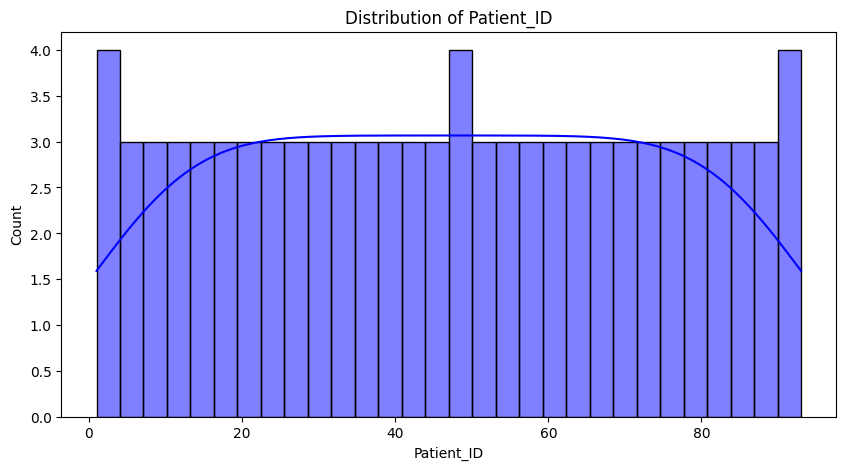

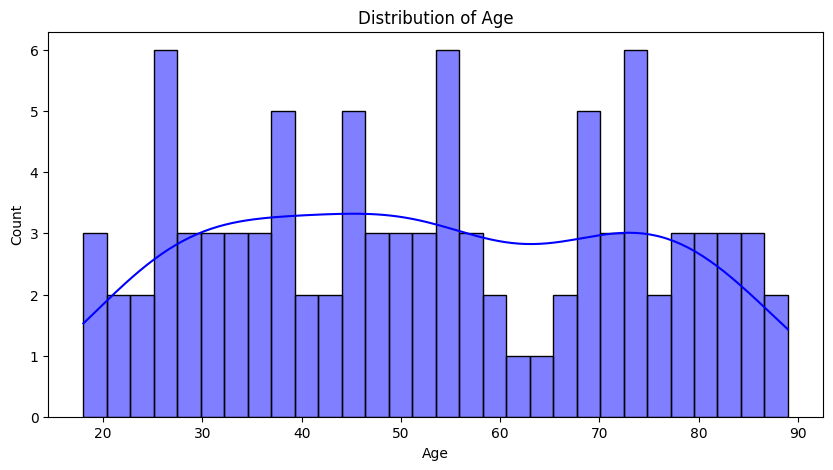

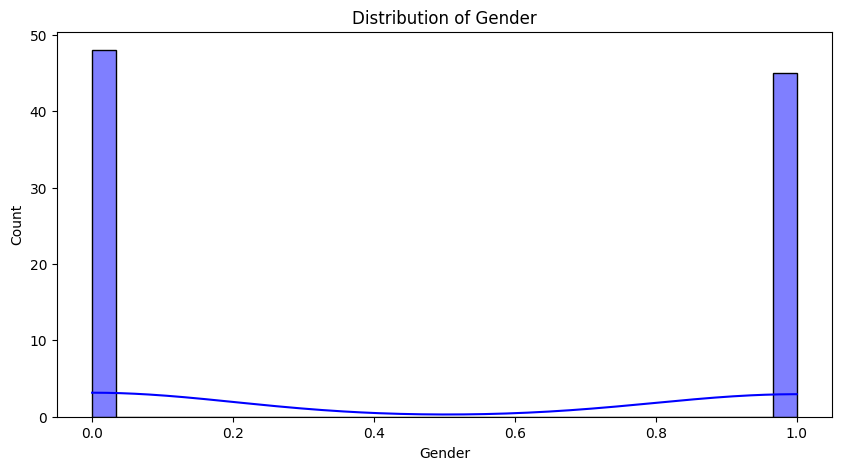

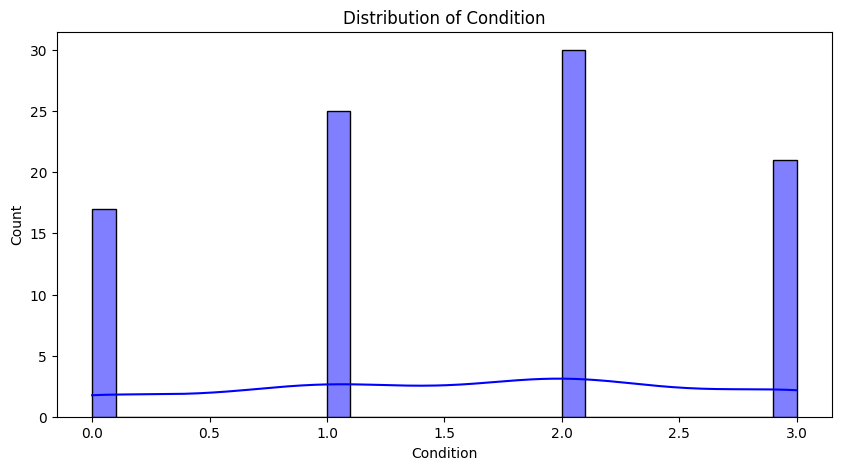

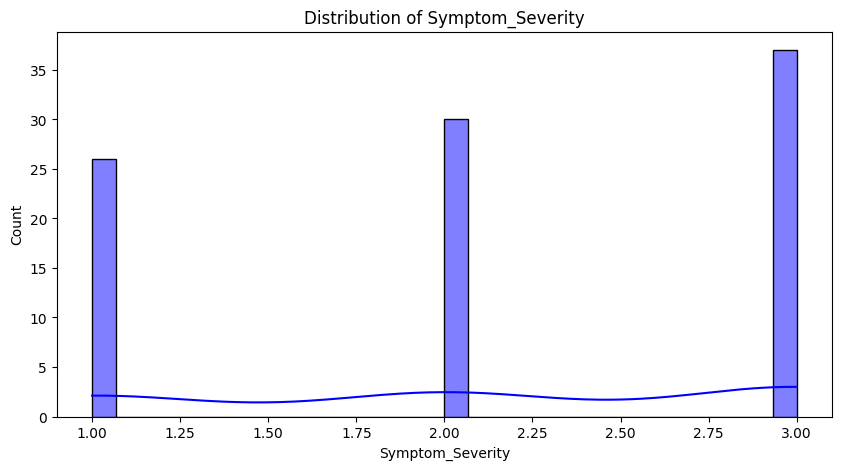

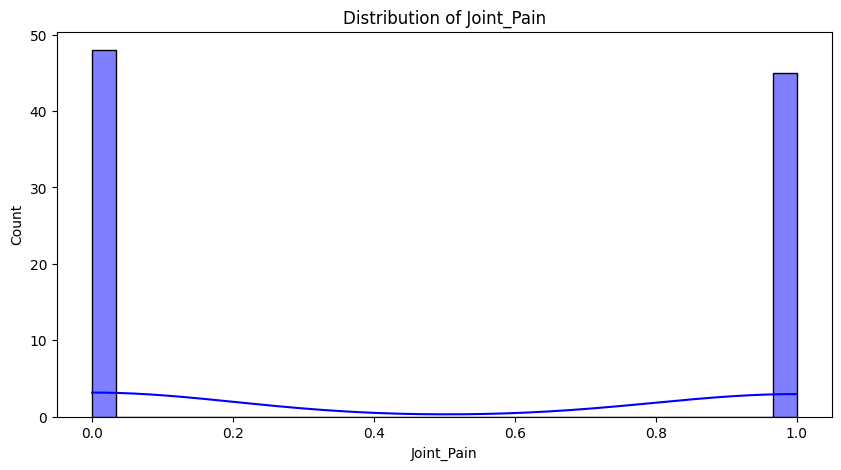

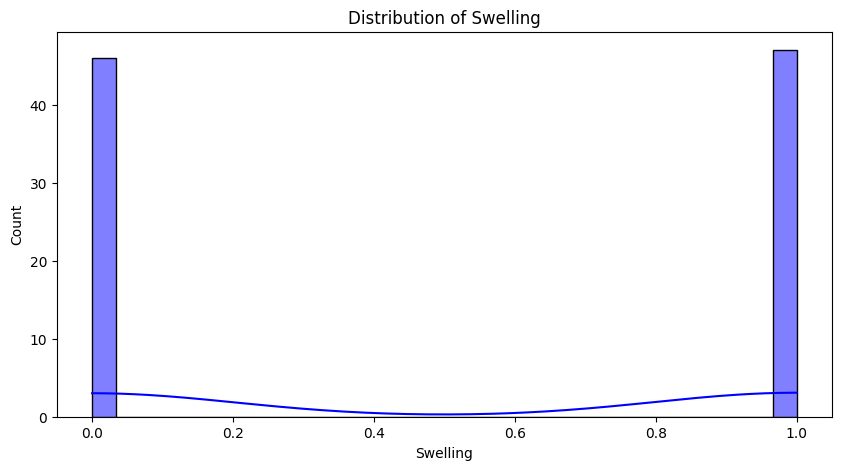

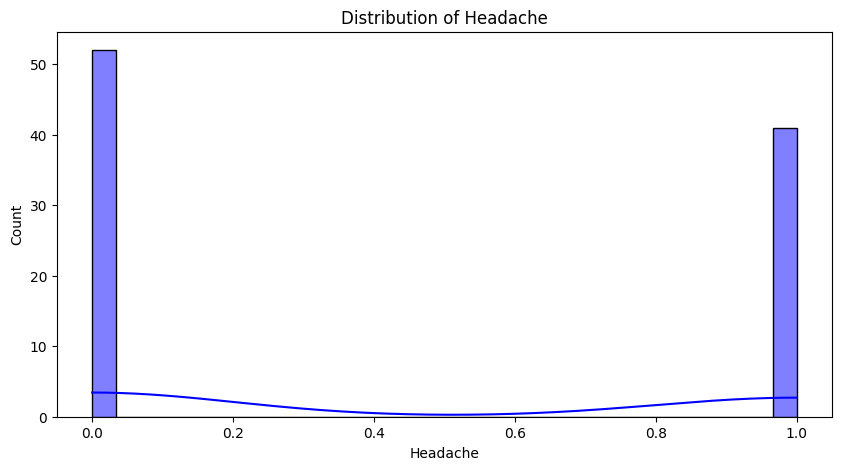

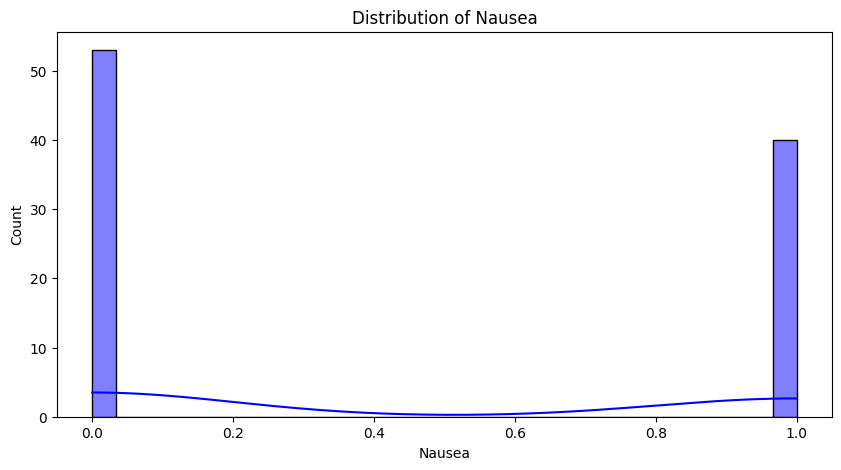

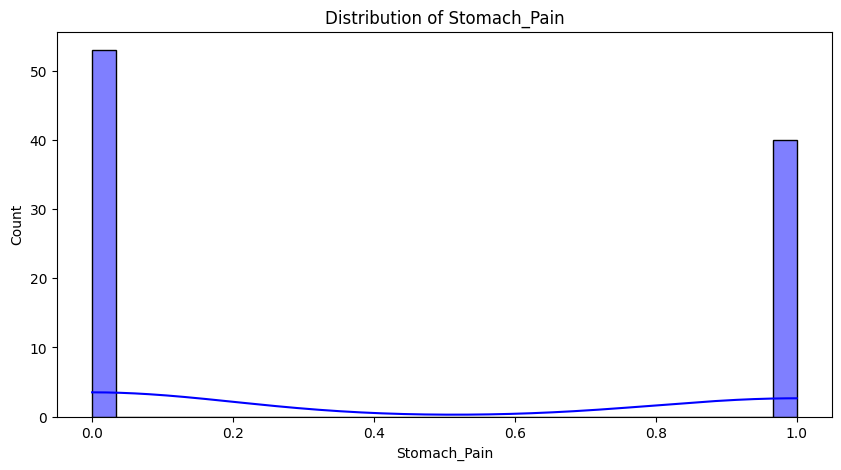

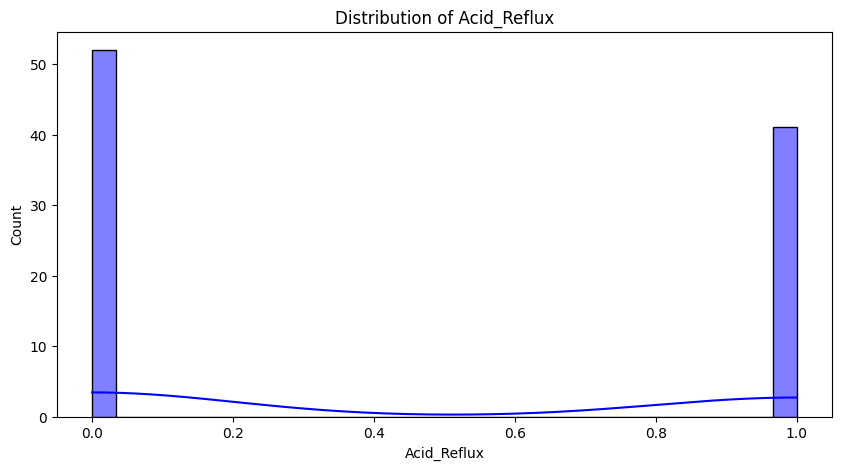

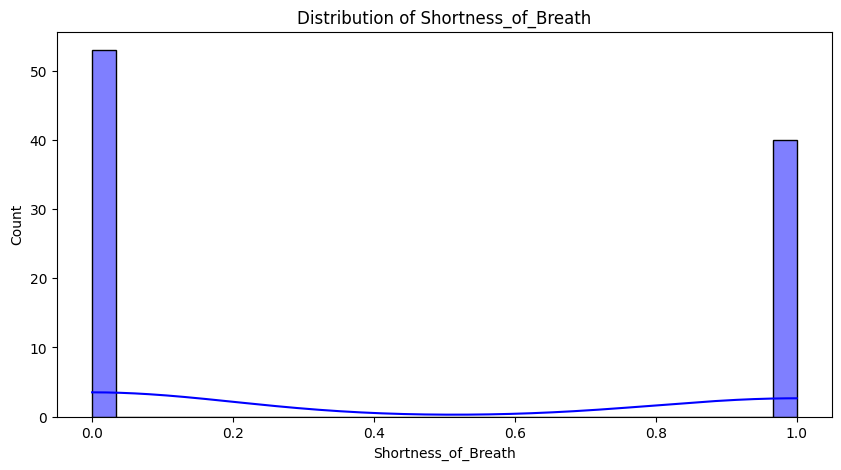

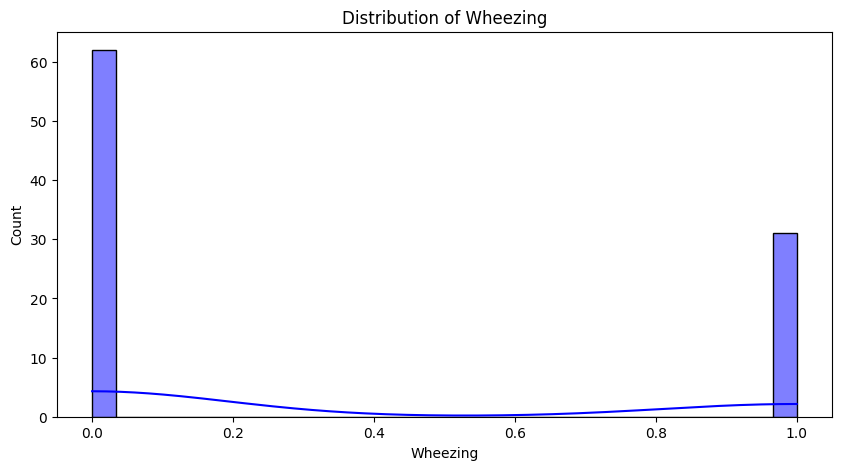

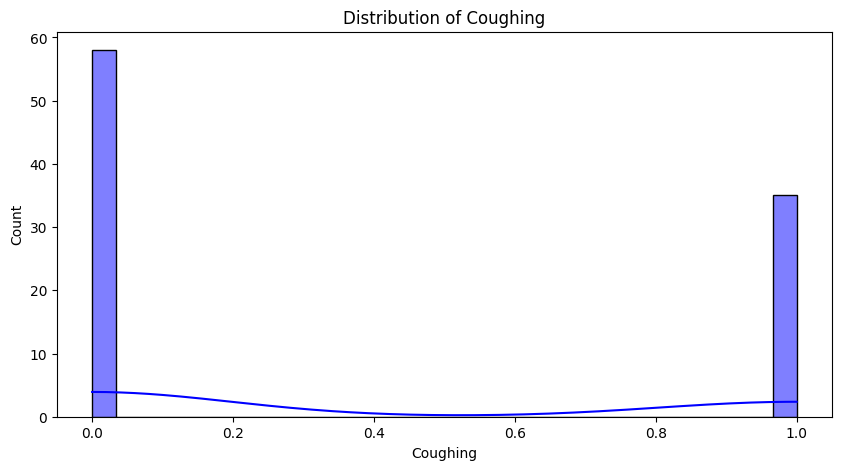

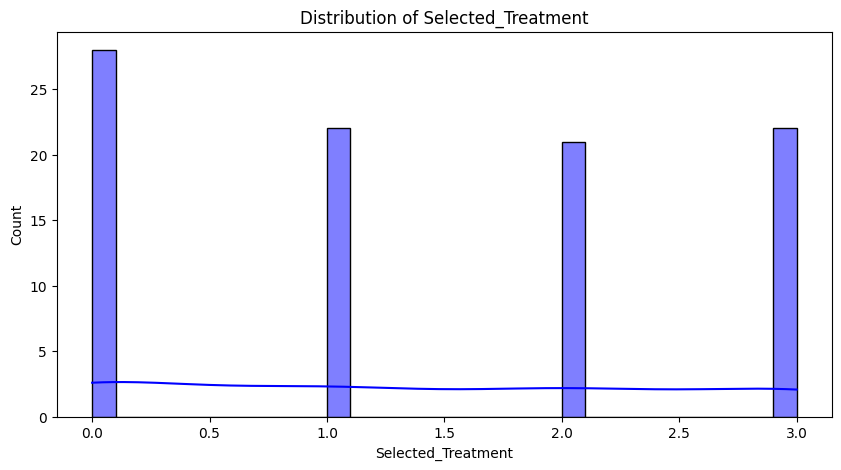

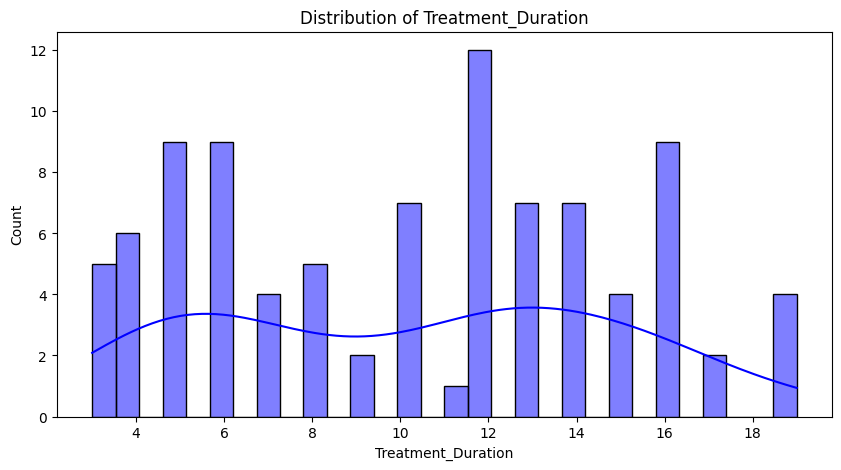

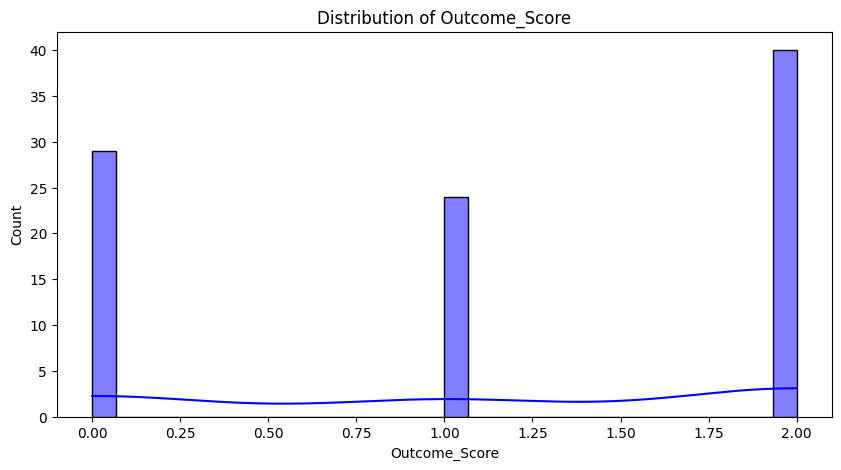

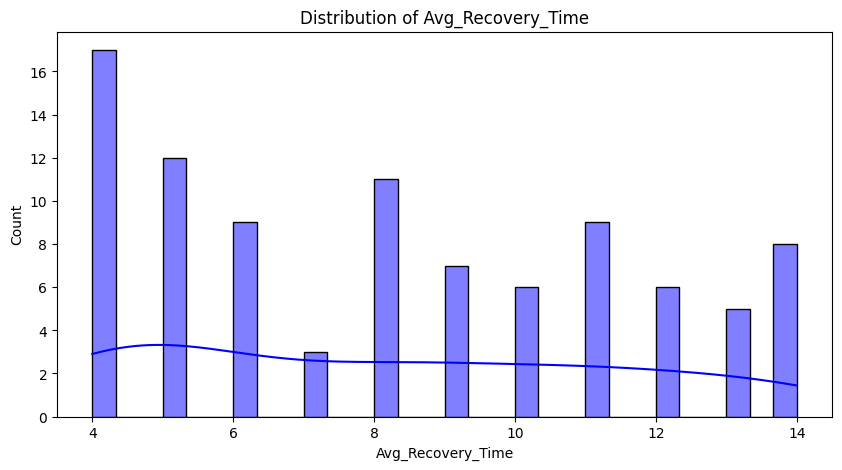

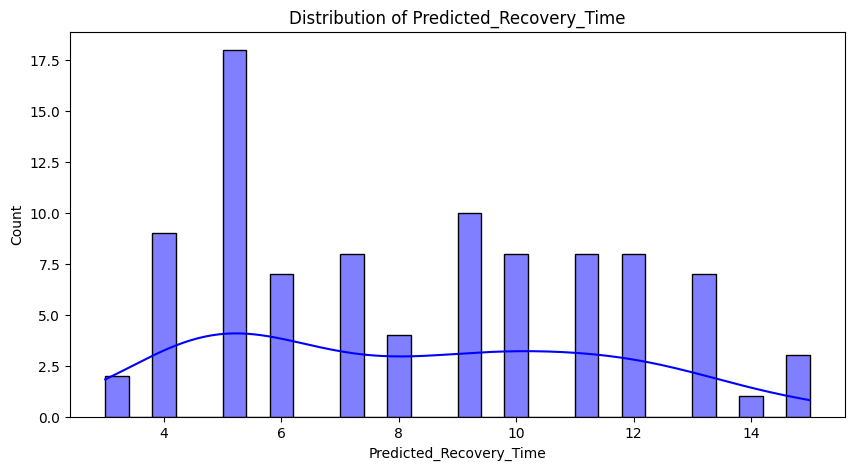

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nStatistical Summary:")
print(df.describe(include="all"))

# Visualize categorical and numerical features
categorical_columns = df.select_dtypes(include=["object"]).columns
numerical_columns = df.select_dtypes(include=["number"]).columns

# Plot categorical features
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Plot numerical features
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, kde=True, color="blue", bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


### **Step 3: Data Preprocessing**

In [ ]:
# Handling Missing Values
# Fill missing categorical values with mode
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill missing numerical values with median
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

# Encoding Categorical Variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature Scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Verify preprocessing
print("\nDataset After Preprocessing:")
print(df.head())



Dataset After Preprocessing:
   Patient_ID       Age    Gender  Condition  Symptom_Severity  Joint_Pain  \
0   -1.713526 -0.386207  1.032796  -1.546541          1.082514    1.032796   
1   -1.676275 -0.979063 -0.968246  -0.574728         -0.145215   -0.968246   
2   -1.639025  0.107840  1.032796   0.397085         -1.372945   -0.968246   
3   -1.601774 -1.176682  1.032796   1.368898          1.082514   -0.968246   
4   -1.564523 -0.583825 -0.968246  -1.546541         -0.145215    1.032796   

   Swelling  Headache    Nausea  Stomach_Pain  Acid_Reflux  \
0  0.989305 -0.887954 -0.868744     -0.868744    -0.887954   
1 -1.010811  1.126185  1.151086     -0.868744    -0.887954   
2 -1.010811 -0.887954 -0.868744      1.151086    -0.887954   
3 -1.010811 -0.887954 -0.868744     -0.868744    -0.887954   
4 -1.010811 -0.887954 -0.868744     -0.868744    -0.887954   

   Shortness_of_Breath  Wheezing  Coughing  Selected_Treatment  \
0            -0.868744 -0.707107 -0.776819           -1.219060

### **Step 4: Feature Selection**

In [ ]:
# Define the two target variables
target_1 = "Outcome_Score"
target_2 = "Predicted_Recovery_Time"

# Features (drop both targets from the features set)
X = df.drop(columns=[target_1, target_2], errors='ignore')  # Ignore if columns not found
y1 = df[target_1]  # Target 1
y2 = df[target_2]  # Target 2

# Drop redundant and low-impact features based on correlation analysis
# This line is moved BEFORE feature selection to ensure consistency:
# Check if columns exist before dropping to prevent KeyError
if "Patient_ID" in df.columns and "Avg_Recovery_Time" in df.columns:
    df = df.drop(columns=["Patient_ID", "Avg_Recovery_Time"])  # Drop Patient_ID and Avg_Recovery_Time
    X = X.drop(columns=["Patient_ID", "Avg_Recovery_Time"], errors='ignore')  # Also drop from X, ignore if not found

# Instead of StandardScaler, use MinMaxScaler to scale features to a range of [0, 1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Update numerical_columns to exclude target variables
numerical_columns = [col for col in numerical_columns if col not in [target_1, target_2]]

# Apply scaling to the updated numerical columns in X
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])


# Use f_regression for numerical targets (Outcome_Score and Predicted_Recovery_Time)
from sklearn.feature_selection import f_regression

# SelectKBest for Target 1: Outcome_Score
selector_y1 = SelectKBest(score_func=f_regression, k=5)  # Top 5 features for target 1
X_new_y1 = selector_y1.fit_transform(X, y1)  # Use the modified X
selected_features_y1 = X.columns[selector_y1.get_support()]  # Use the modified X's columns

print("\nSelected Features for Outcome_Score (Target 1):")
print(selected_features_y1)

# SelectKBest for Target 2: Predicted_Recovery_Time
selector_y2 = SelectKBest(score_func=f_regression, k=5)  # Top 5 features for target 2
X_new_y2 = selector_y2.fit_transform(X, y2)  # Use the modified X
selected_features_y2 = X.columns[selector_y2.get_support()]  # Use the modified X's columns

print("\nSelected Features for Predicted_Recovery_Time (Target 2):")
print(selected_features_y2)

# Combine Selected Features
selected_features_combined = list(set(selected_features_y1) | set(selected_features_y2))
print("\nCombined Selected Features for Both Targets:")
print(selected_features_combined)

# Filter the dataset to only include the selected features and the targets
X_selected = df[selected_features_combined]
print("\nDataset with Selected Features:")
print(X_selected.head())

KeyError: "['Patient_ID', 'Avg_Recovery_Time'] not in index"

### **Step 1: Setup Google Colab and Load Dataset**

In [ ]:
# Install necessary libraries if not already installed
!pip install pandas numpy matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

# Mount Google Drive if using Google Colab
from google.colab import files
uploaded = files.upload()  # Upload your dataset file

# Load dataset
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_excel(file_name)

# Display dataset
print("Dataset Preview:")
print(df.head())
print("\nSummary:")
print(df.info())


Saving Expanded_Dataset.xlsx to Expanded_Dataset.xlsx
Dataset Preview:
   Patient_ID  Age  Gender  Condition  Symptom_Severity  Joint_Pain  Swelling  \
0           1   45       1          0                 3           1         1   
1           2   33       0          1                 2           0         0   
2           3   55       1          2                 1           0         0   
3           4   29       1          3                 3           0         0   
4           5   41       0          0                 2           1         0   

   Headache  Nausea  Stomach_Pain  Acid_Reflux  Shortness_of_Breath  Wheezing  \
0         0       0             0            0                    0         0   
1         1       1             0            0                    0         0   
2         0       0             1            0                    0         0   
3         0       0             0            0                    1         0   
4         0       0             0    

### **Step 2: Exploratory Data Analysis (EDA)**


Missing Values:
Patient_ID                 0
Age                        0
Gender                     0
Condition                  0
Symptom_Severity           0
Joint_Pain                 0
Swelling                   0
Headache                   0
Nausea                     0
Stomach_Pain               0
Acid_Reflux                0
Shortness_of_Breath        0
Wheezing                   0
Coughing                   0
Selected_Treatment         0
Treatment_Duration         0
Outcome_Score              0
Avg_Recovery_Time          0
Predicted_Recovery_Time    0
dtype: int64

Statistical Summary:
       Patient_ID        Age     Gender  Condition  Symptom_Severity  \
count   93.000000  93.000000  93.000000  93.000000         93.000000   
mean    47.000000  52.817204   0.483871   1.591398          2.118280   
std     26.990739  20.350700   0.502448   1.034582          0.818926   
min      1.000000  18.000000   0.000000   0.000000          1.000000   
25%     24.000000  36.000000   0.0000

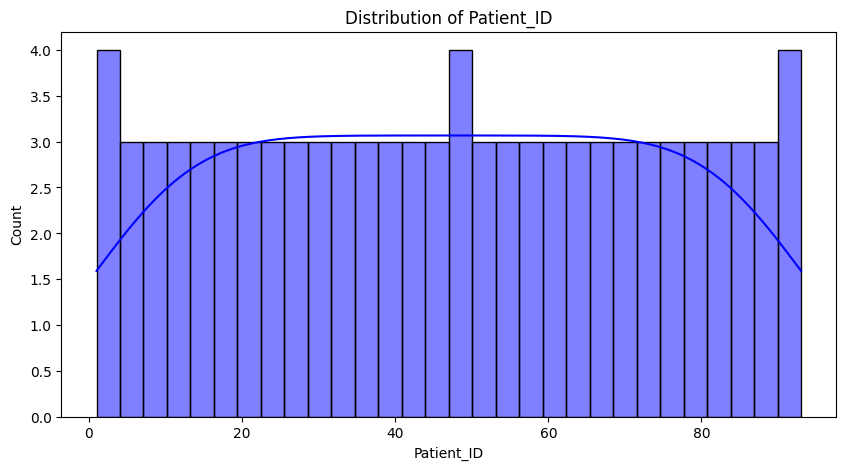

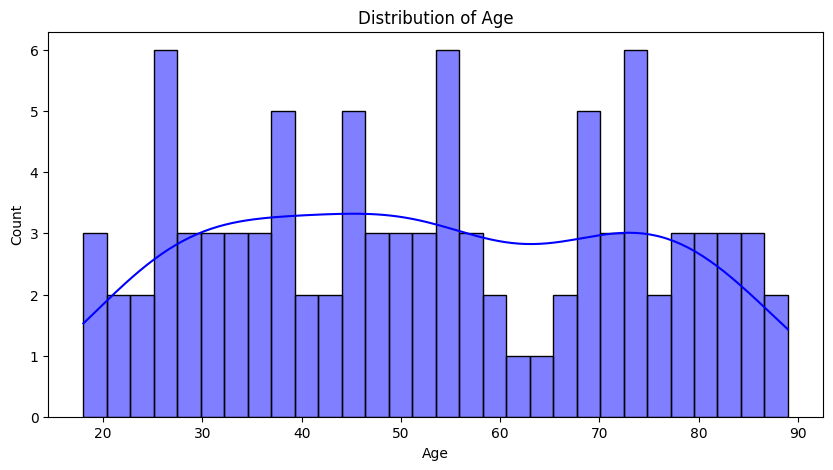

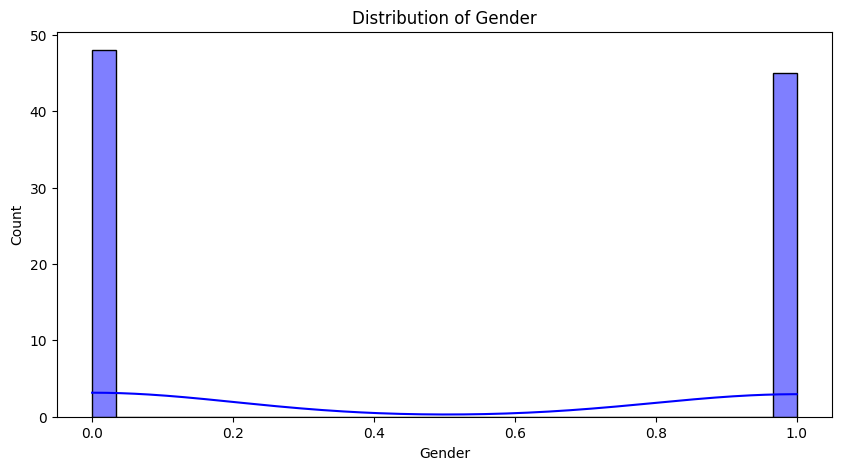

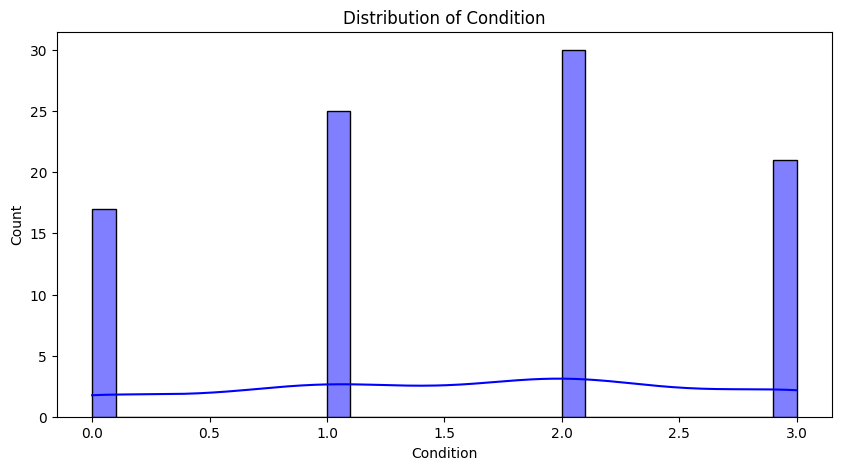

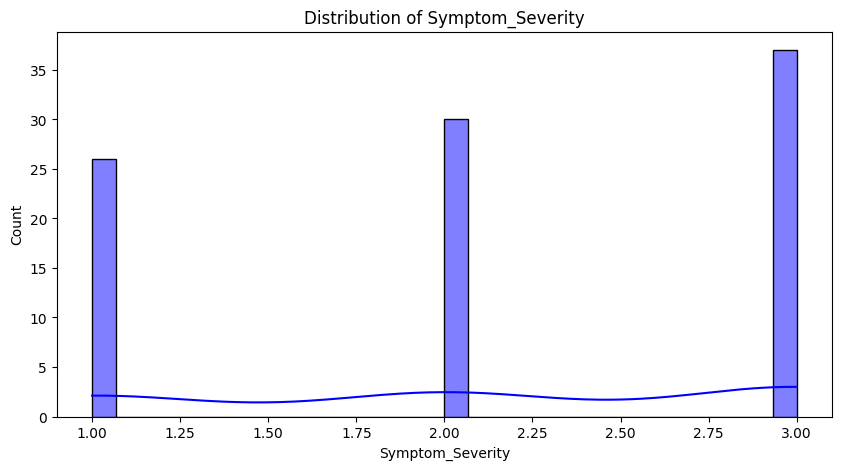

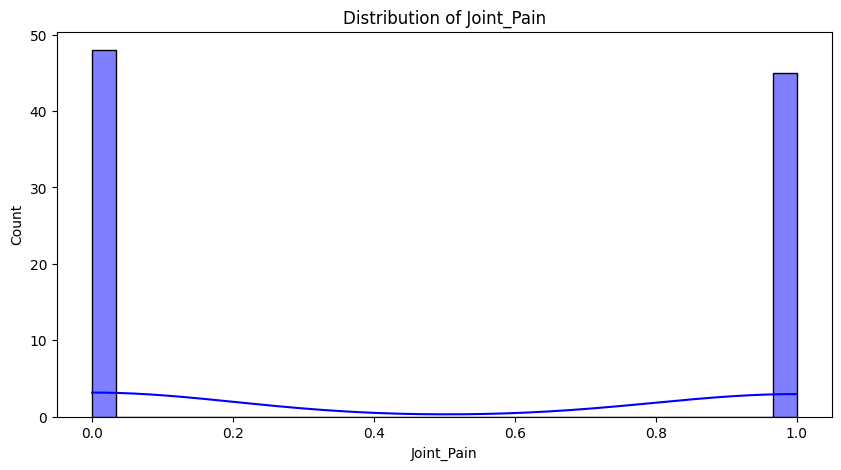

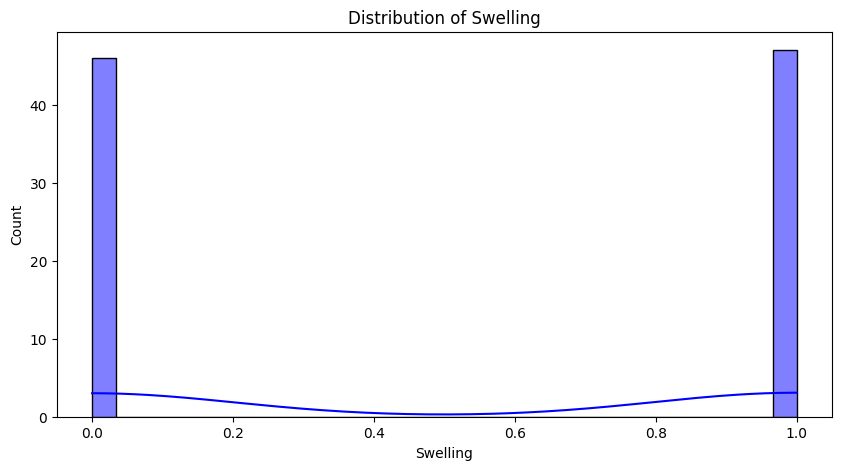

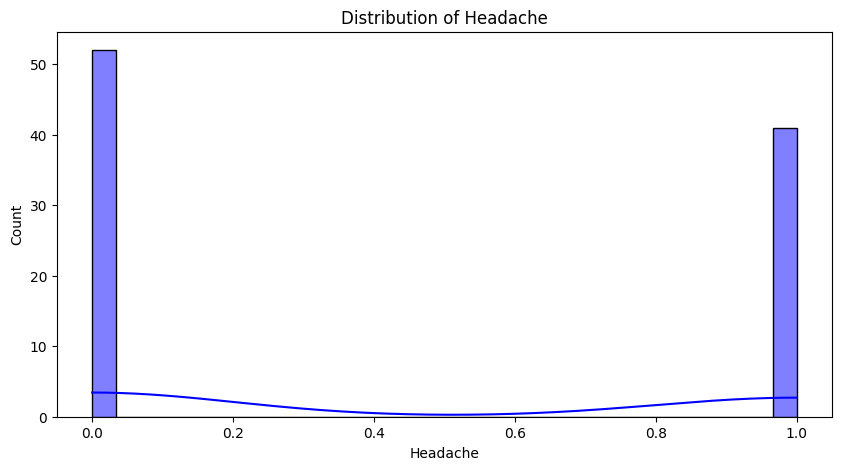

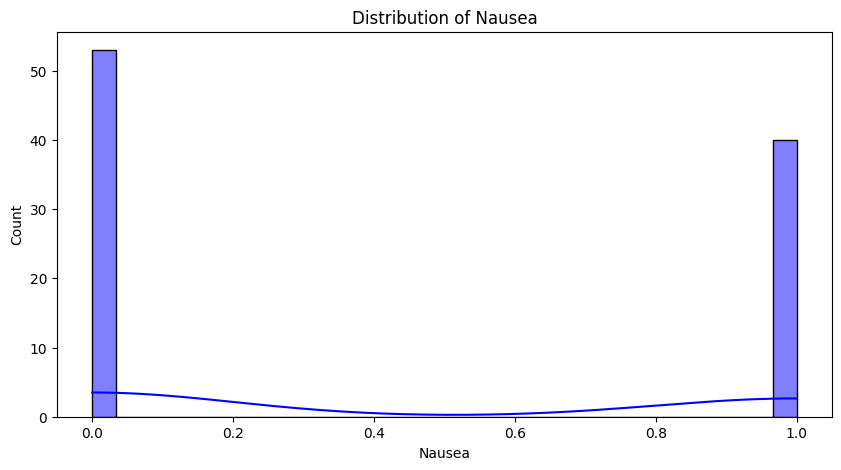

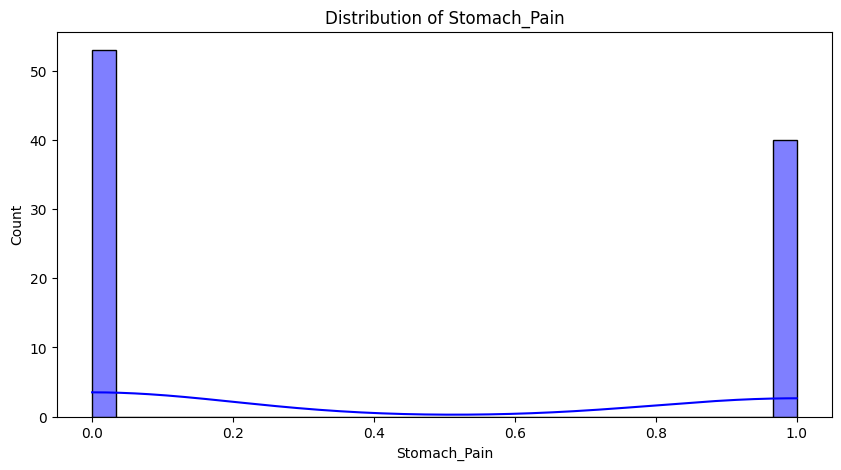

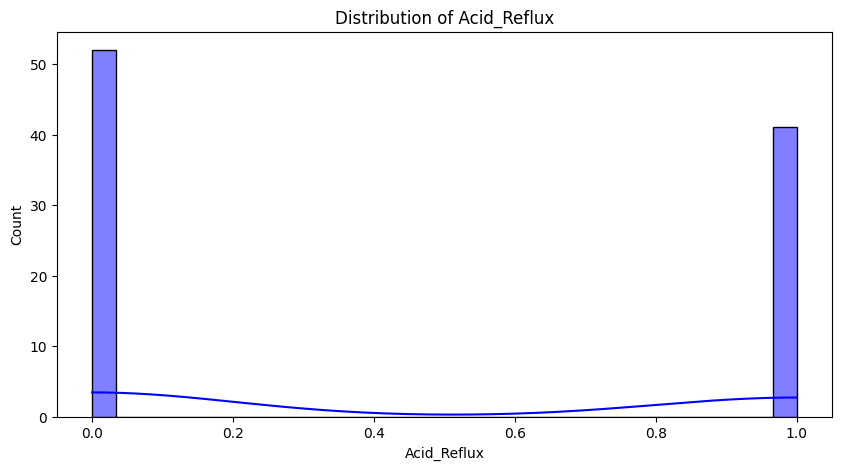

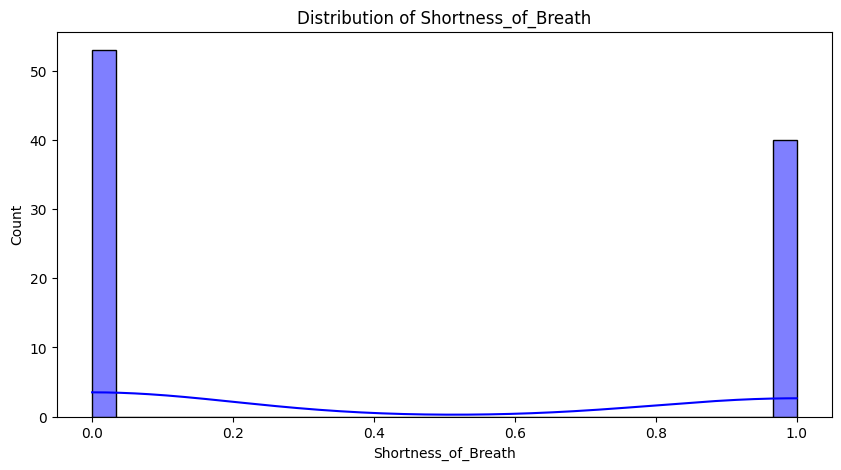

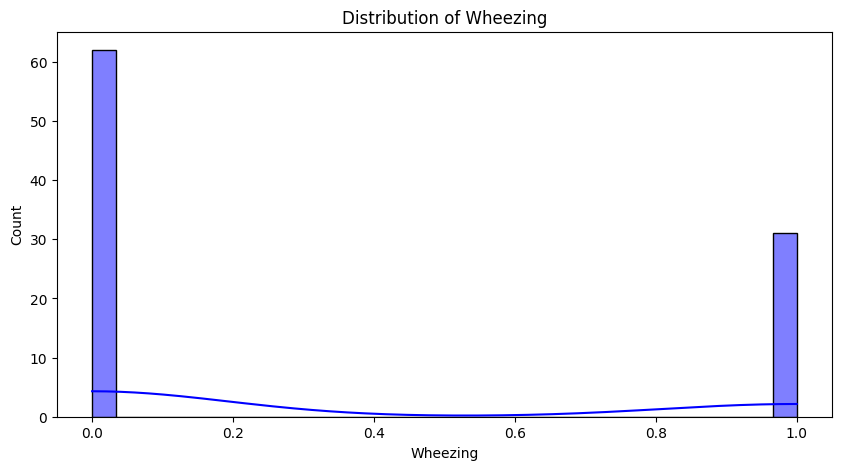

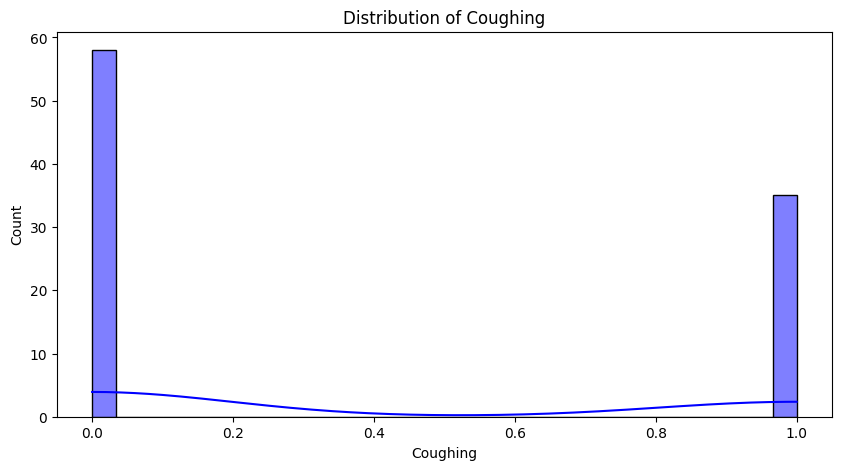

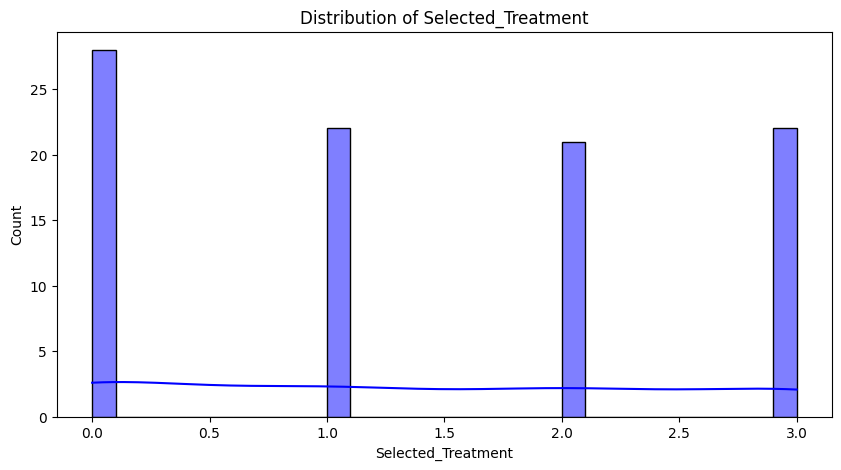

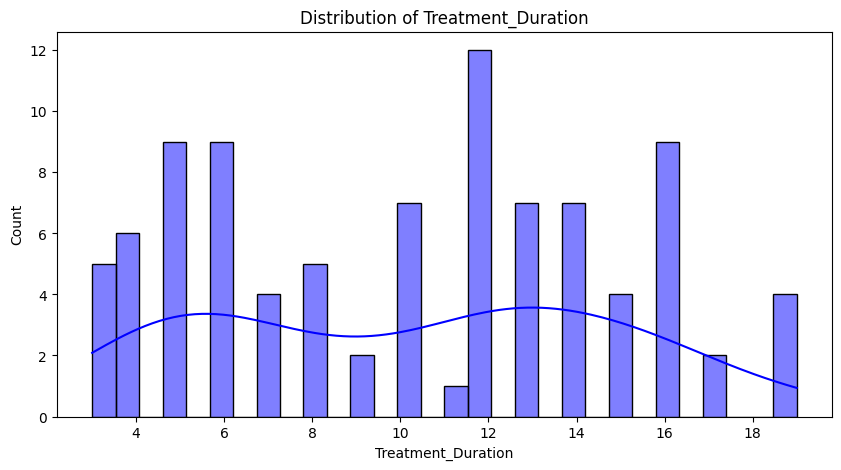

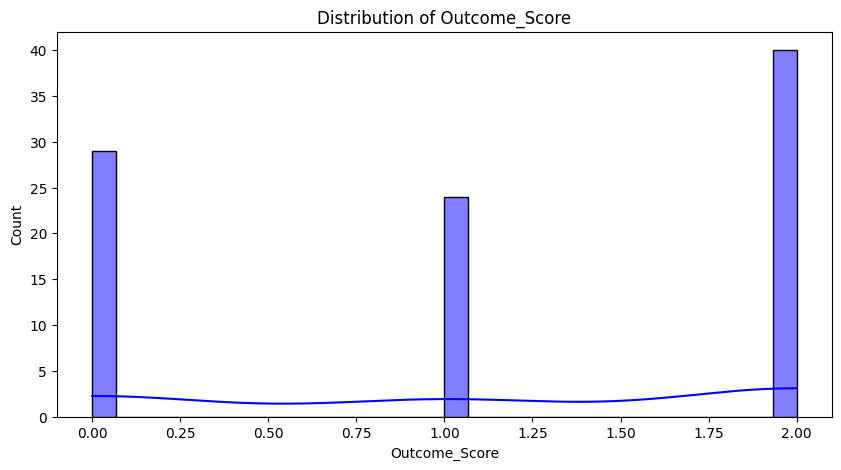

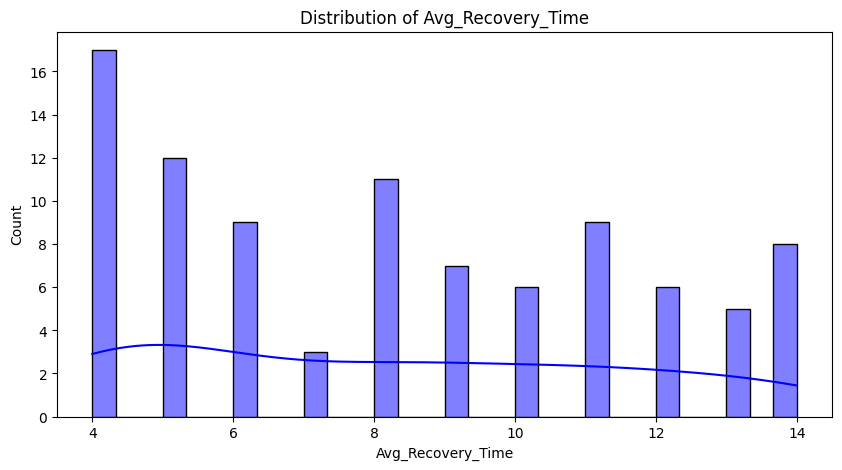

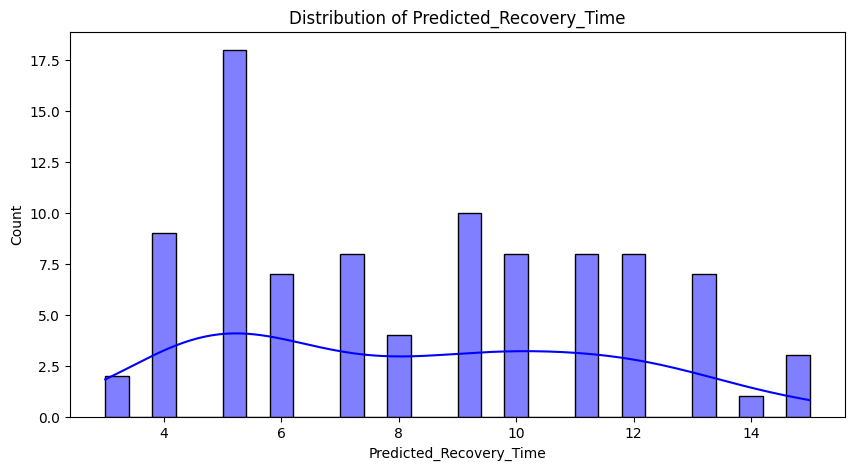

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nStatistical Summary:")
print(df.describe(include="all"))

# Visualize categorical and numerical features
categorical_columns = df.select_dtypes(include=["object"]).columns
numerical_columns = df.select_dtypes(include=["number"]).columns

# Plot categorical features
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Plot numerical features
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, kde=True, color="blue", bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


### **Step 3: Data Preprocessing**

In [ ]:
# Handling Missing Values
# Fill missing categorical values with mode
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill missing numerical values with median
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

# Encoding Categorical Variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature Scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Verify preprocessing
print("\nDataset After Preprocessing:")
print(df.head())



Dataset After Preprocessing:
   Patient_ID       Age    Gender  Condition  Symptom_Severity  Joint_Pain  \
0   -1.713526 -0.386207  1.032796  -1.546541          1.082514    1.032796   
1   -1.676275 -0.979063 -0.968246  -0.574728         -0.145215   -0.968246   
2   -1.639025  0.107840  1.032796   0.397085         -1.372945   -0.968246   
3   -1.601774 -1.176682  1.032796   1.368898          1.082514   -0.968246   
4   -1.564523 -0.583825 -0.968246  -1.546541         -0.145215    1.032796   

   Swelling  Headache    Nausea  Stomach_Pain  Acid_Reflux  \
0  0.989305 -0.887954 -0.868744     -0.868744    -0.887954   
1 -1.010811  1.126185  1.151086     -0.868744    -0.887954   
2 -1.010811 -0.887954 -0.868744      1.151086    -0.887954   
3 -1.010811 -0.887954 -0.868744     -0.868744    -0.887954   
4 -1.010811 -0.887954 -0.868744     -0.868744    -0.887954   

   Shortness_of_Breath  Wheezing  Coughing  Selected_Treatment  \
0            -0.868744 -0.707107 -0.776819           -1.219060

### **Step 4: Feature Selection**

In [ ]:
# Define the two target variables
target_1 = "Outcome_Score"
target_2 = "Predicted_Recovery_Time"

# Features (drop both targets from the features set)
X = df.drop(columns=[target_1, target_2], errors='ignore')  # Ignore if columns not found
y1 = df[target_1]  # Target 1
y2 = df[target_2]  # Target 2

# Drop redundant and low-impact features based on correlation analysis
# This line is moved BEFORE feature selection to ensure consistency:
# Check if columns exist before dropping to prevent KeyError
if "Patient_ID" in df.columns and "Avg_Recovery_Time" in df.columns:
    df = df.drop(columns=["Patient_ID", "Avg_Recovery_Time"])  # Drop Patient_ID and Avg_Recovery_Time
    X = X.drop(columns=["Patient_ID", "Avg_Recovery_Time"], errors='ignore')  # Also drop from X, ignore if not found

# Instead of StandardScaler, use MinMaxScaler to scale features to a range of [0, 1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Update numerical_columns to exclude target variables
numerical_columns = [col for col in numerical_columns if col not in [target_1, target_2]]

# Apply scaling to the updated numerical columns in X
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])


# Use f_regression for numerical targets (Outcome_Score and Predicted_Recovery_Time)
from sklearn.feature_selection import f_regression

# SelectKBest for Target 1: Outcome_Score
selector_y1 = SelectKBest(score_func=f_regression, k=5)  # Top 5 features for target 1
X_new_y1 = selector_y1.fit_transform(X, y1)  # Use the modified X
selected_features_y1 = X.columns[selector_y1.get_support()]  # Use the modified X's columns

print("\nSelected Features for Outcome_Score (Target 1):")
print(selected_features_y1)

# SelectKBest for Target 2: Predicted_Recovery_Time
selector_y2 = SelectKBest(score_func=f_regression, k=5)  # Top 5 features for target 2
X_new_y2 = selector_y2.fit_transform(X, y2)  # Use the modified X
selected_features_y2 = X.columns[selector_y2.get_support()]  # Use the modified X's columns

print("\nSelected Features for Predicted_Recovery_Time (Target 2):")
print(selected_features_y2)

# Combine Selected Features
selected_features_combined = list(set(selected_features_y1) | set(selected_features_y2))
print("\nCombined Selected Features for Both Targets:")
print(selected_features_combined)

# Filter the dataset to only include the selected features and the targets
X_selected = df[selected_features_combined]
print("\nDataset with Selected Features:")
print(X_selected.head())

KeyError: "['Patient_ID', 'Avg_Recovery_Time'] not in index"

### **Step 1: Setup Google Colab and Load Dataset**

In [ ]:
# Install necessary libraries if not already installed
!pip install pandas numpy matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

# Mount Google Drive if using Google Colab
from google.colab import files
uploaded = files.upload()  # Upload your dataset file

# Load dataset
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_excel(file_name)

# Display dataset
print("Dataset Preview:")
print(df.head())
print("\nSummary:")
print(df.info())


Saving Expanded_Dataset.xlsx to Expanded_Dataset.xlsx
Dataset Preview:
   Patient_ID  Age  Gender  Condition  Symptom_Severity  Joint_Pain  Swelling  \
0           1   45       1          0                 3           1         1   
1           2   33       0          1                 2           0         0   
2           3   55       1          2                 1           0         0   
3           4   29       1          3                 3           0         0   
4           5   41       0          0                 2           1         0   

   Headache  Nausea  Stomach_Pain  Acid_Reflux  Shortness_of_Breath  Wheezing  \
0         0       0             0            0                    0         0   
1         1       1             0            0                    0         0   
2         0       0             1            0                    0         0   
3         0       0             0            0                    1         0   
4         0       0             0    

### **Step 2: Exploratory Data Analysis (EDA)**


Missing Values:
Age                        0
Gender                     0
Condition                  0
Symptom_Severity           0
Joint_Pain                 0
Swelling                   0
Headache                   0
Nausea                     0
Stomach_Pain               0
Acid_Reflux                0
Shortness_of_Breath        0
Wheezing                   0
Coughing                   0
Selected_Treatment         0
Treatment_Duration         0
Outcome_Score              0
Predicted_Recovery_Time    0
dtype: int64

Statistical Summary:
                Age        Gender     Condition  Symptom_Severity  \
count  9.300000e+01  9.300000e+01  9.300000e+01      9.300000e+01   
mean  -1.408670e-16 -8.117760e-17  4.058880e-17      7.640244e-17   
std    1.005420e+00  1.005420e+00  1.005420e+00      1.005420e+00   
min   -1.720133e+00 -9.682458e-01 -1.546541e+00     -1.372945e+00   
25%   -8.308488e-01 -9.682458e-01 -5.747280e-01     -1.372945e+00   
50%   -4.037373e-02 -9.682458e-01  3.9708

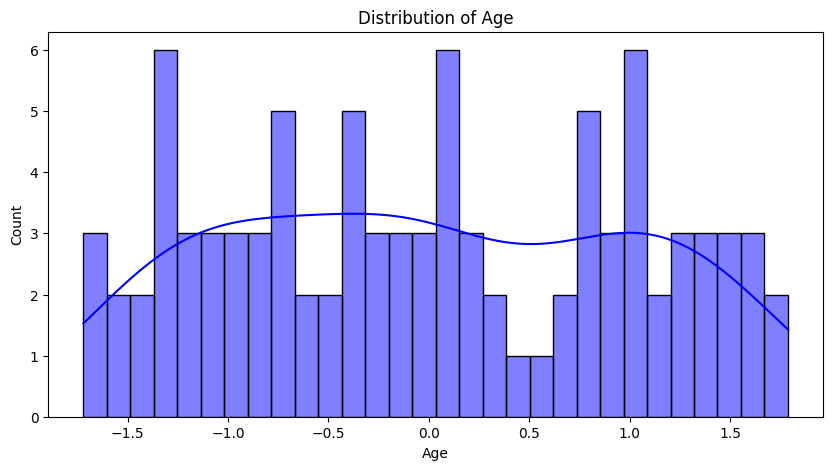

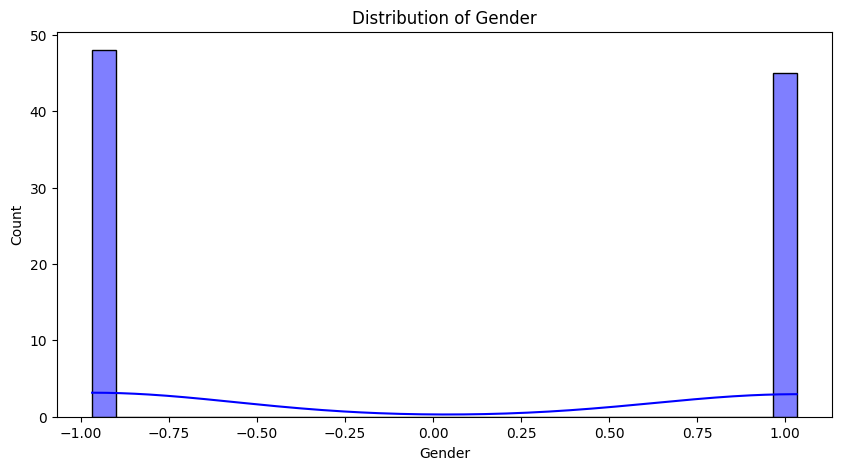

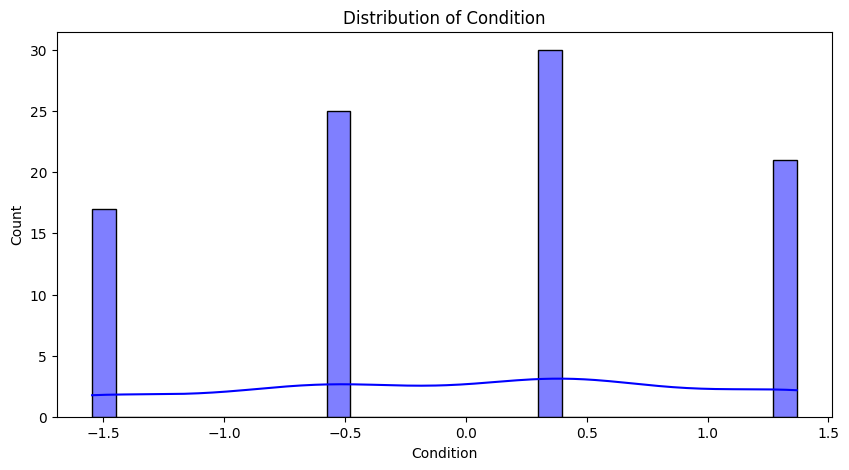

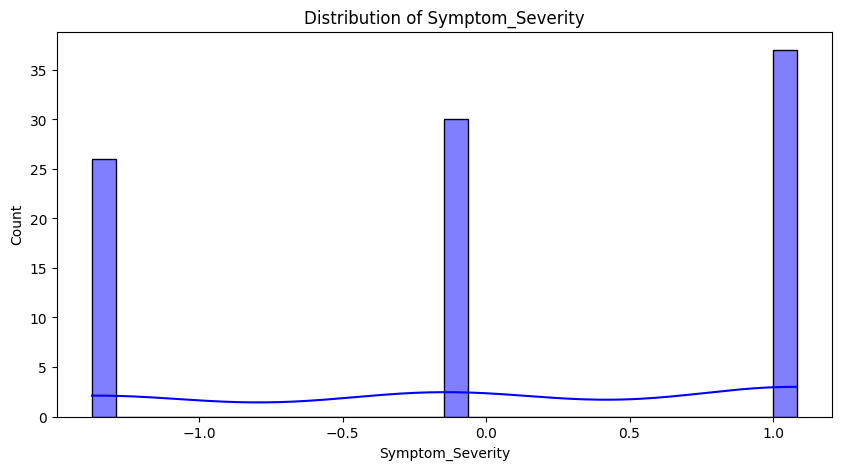

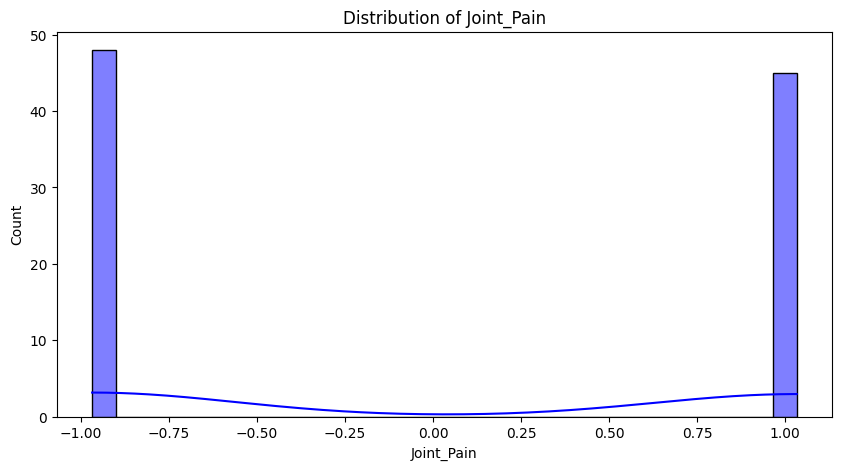

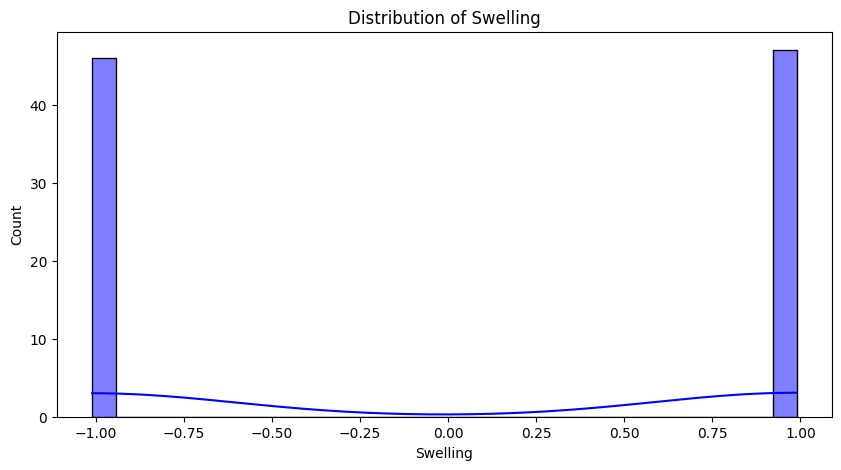

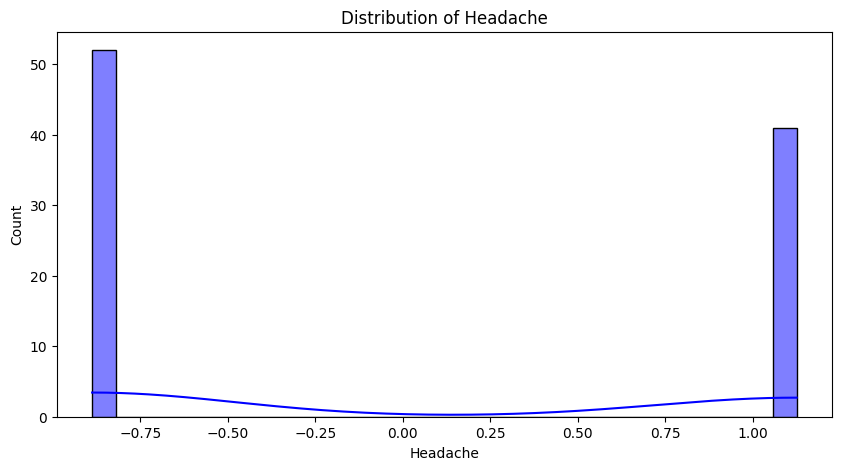

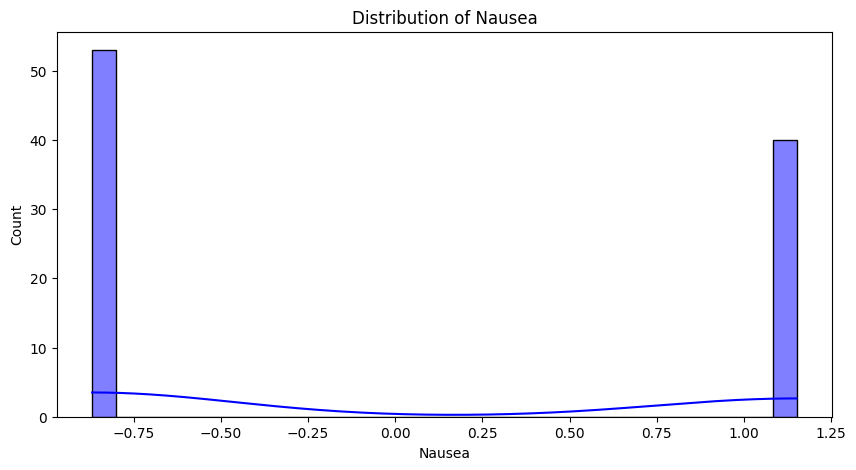

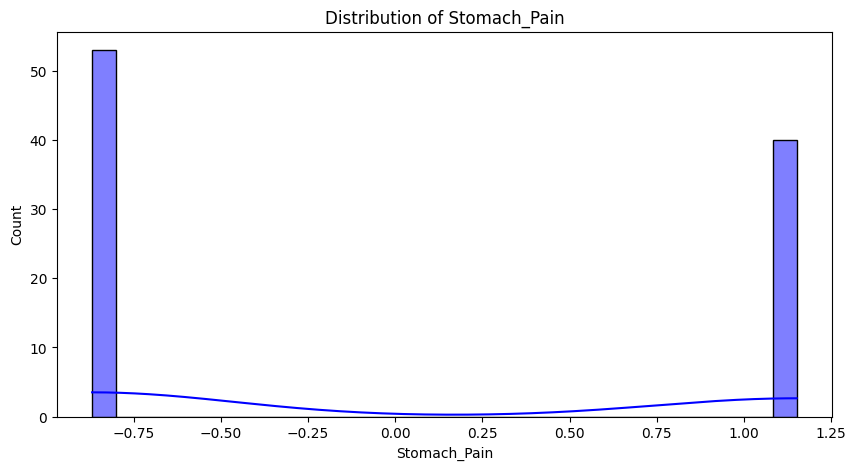

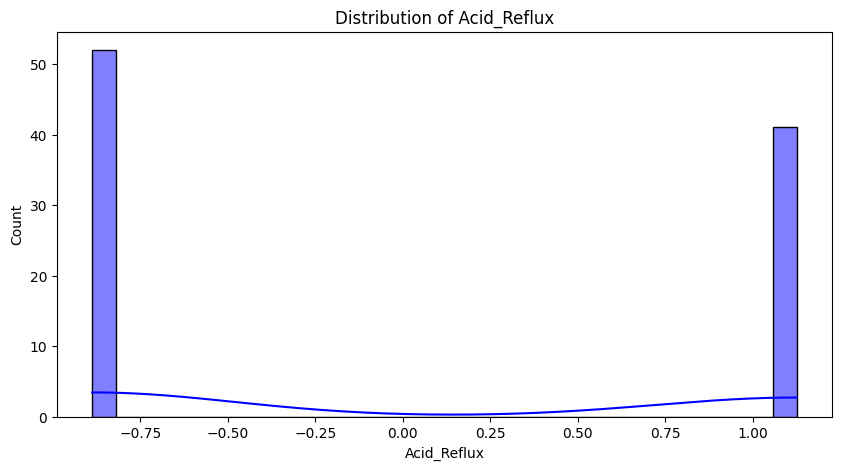

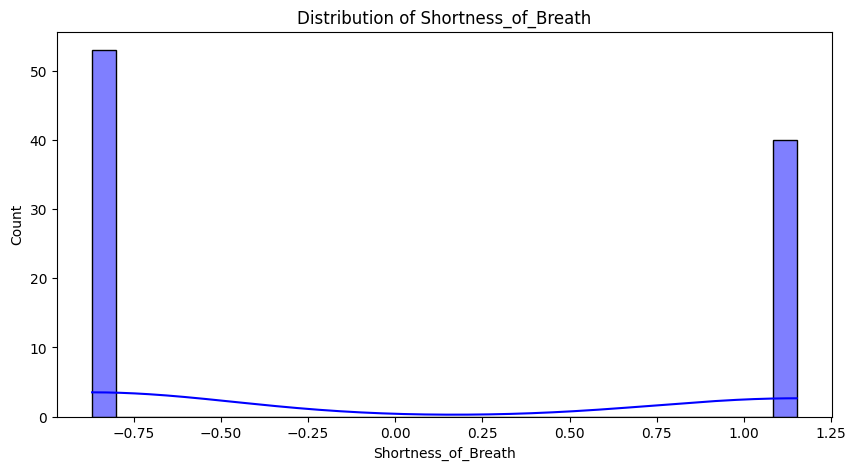

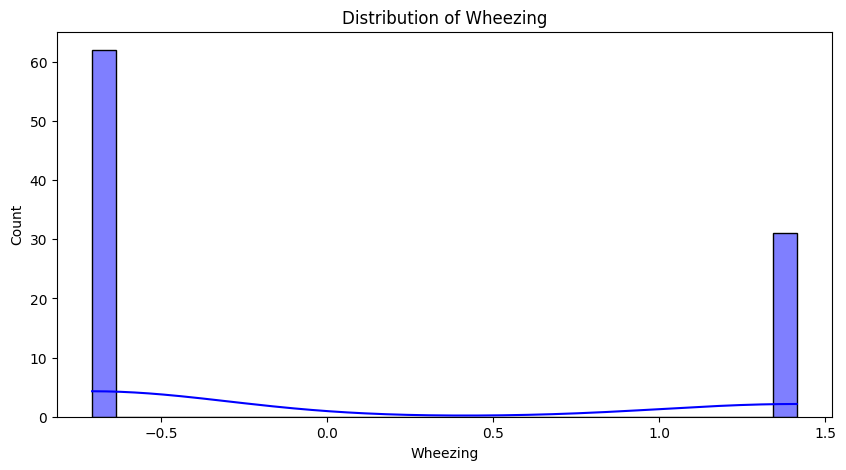

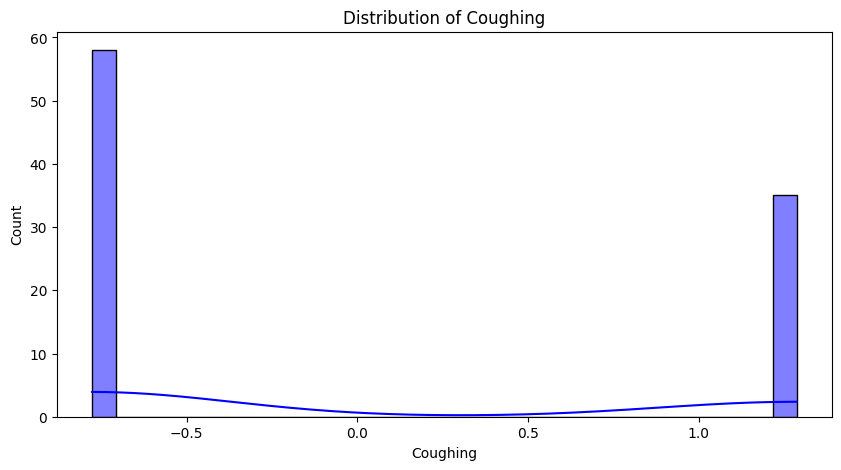

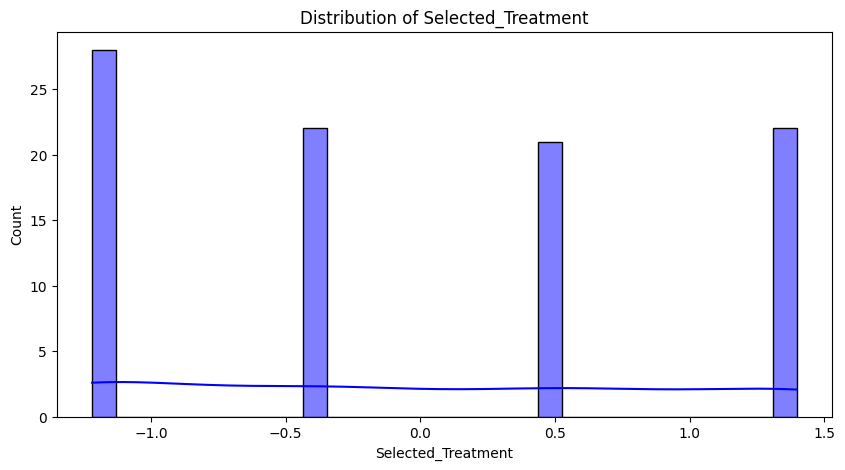

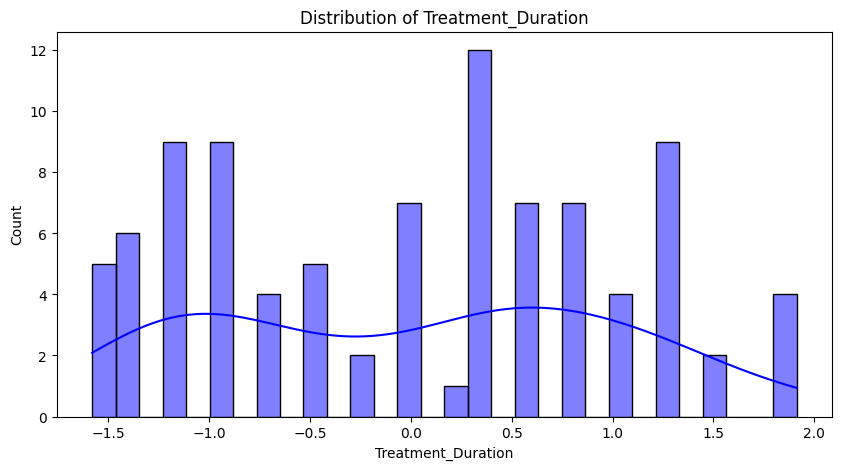

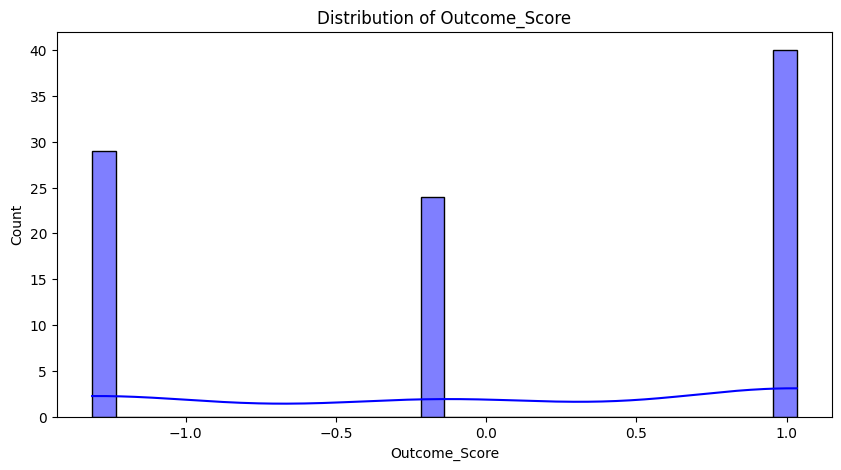

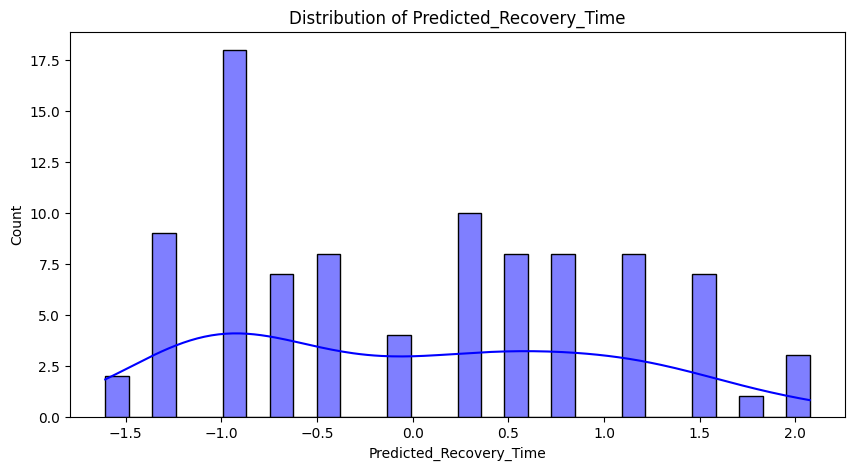

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nStatistical Summary:")
print(df.describe(include="all"))

# Visualize categorical and numerical features
categorical_columns = df.select_dtypes(include=["object"]).columns
numerical_columns = df.select_dtypes(include=["number"]).columns

# Plot categorical features
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Plot numerical features
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, kde=True, color="blue", bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


### **Step 3: Data Preprocessing**

In [ ]:
# Handling Missing Values
# Fill missing categorical values with mode
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill missing numerical values with median
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

# Encoding Categorical Variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature Scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Verify preprocessing
print("\nDataset After Preprocessing:")
print(df.head())



Dataset After Preprocessing:
   Patient_ID       Age    Gender  Condition  Symptom_Severity  Joint_Pain  \
0   -1.713526 -0.386207  1.032796  -1.546541          1.082514    1.032796   
1   -1.676275 -0.979063 -0.968246  -0.574728         -0.145215   -0.968246   
2   -1.639025  0.107840  1.032796   0.397085         -1.372945   -0.968246   
3   -1.601774 -1.176682  1.032796   1.368898          1.082514   -0.968246   
4   -1.564523 -0.583825 -0.968246  -1.546541         -0.145215    1.032796   

   Swelling  Headache    Nausea  Stomach_Pain  Acid_Reflux  \
0  0.989305 -0.887954 -0.868744     -0.868744    -0.887954   
1 -1.010811  1.126185  1.151086     -0.868744    -0.887954   
2 -1.010811 -0.887954 -0.868744      1.151086    -0.887954   
3 -1.010811 -0.887954 -0.868744     -0.868744    -0.887954   
4 -1.010811 -0.887954 -0.868744     -0.868744    -0.887954   

   Shortness_of_Breath  Wheezing  Coughing  Selected_Treatment  \
0            -0.868744 -0.707107 -0.776819           -1.219060

### **Step 4: Feature Selection**

In [ ]:
# Define the two target variables
target_1 = "Outcome_Score"
target_2 = "Predicted_Recovery_Time"

# Features (drop both targets from the features set)
X = df.drop(columns=[target_1, target_2], errors='ignore')  # Ignore if columns not found
y1 = df[target_1]  # Target 1
y2 = df[target_2]  # Target 2

# Drop redundant and low-impact features based on correlation analysis
# This line is moved BEFORE feature selection to ensure consistency:
# Check if columns exist before dropping to prevent KeyError
if "Patient_ID" in df.columns and "Avg_Recovery_Time" in df.columns:
    df = df.drop(columns=["Patient_ID", "Avg_Recovery_Time"])  # Drop Patient_ID and Avg_Recovery_Time
    X = X.drop(columns=["Patient_ID", "Avg_Recovery_Time"], errors='ignore')  # Also drop from X, ignore if not found

# Instead of StandardScaler, use MinMaxScaler to scale features to a range of [0, 1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Update numerical_columns to exclude target variables
numerical_columns = [col for col in numerical_columns if col not in [target_1, target_2]]

# Apply scaling to the updated numerical columns in X
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])


# Use f_regression for numerical targets (Outcome_Score and Predicted_Recovery_Time)
from sklearn.feature_selection import f_regression

# SelectKBest for Target 1: Outcome_Score
selector_y1 = SelectKBest(score_func=f_regression, k=5)  # Top 5 features for target 1
X_new_y1 = selector_y1.fit_transform(X, y1)  # Use the modified X
selected_features_y1 = X.columns[selector_y1.get_support()]  # Use the modified X's columns

print("\nSelected Features for Outcome_Score (Target 1):")
print(selected_features_y1)

# SelectKBest for Target 2: Predicted_Recovery_Time
selector_y2 = SelectKBest(score_func=f_regression, k=5)  # Top 5 features for target 2
X_new_y2 = selector_y2.fit_transform(X, y2)  # Use the modified X
selected_features_y2 = X.columns[selector_y2.get_support()]  # Use the modified X's columns

print("\nSelected Features for Predicted_Recovery_Time (Target 2):")
print(selected_features_y2)

# Combine Selected Features
selected_features_combined = list(set(selected_features_y1) | set(selected_features_y2))
print("\nCombined Selected Features for Both Targets:")
print(selected_features_combined)

# Filter the dataset to only include the selected features and the targets
X_selected = df[selected_features_combined]
print("\nDataset with Selected Features:")
print(X_selected.head())

KeyError: "['Patient_ID', 'Avg_Recovery_Time'] not in index"

### **Step 1: Setup Google Colab and Load Dataset**

In [ ]:
# Install necessary libraries if not already installed
!pip install pandas numpy matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

# Mount Google Drive if using Google Colab
from google.colab import files
uploaded = files.upload()  # Upload your dataset file

# Load dataset
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_excel(file_name)

# Display dataset
print("Dataset Preview:")
print(df.head())
print("\nSummary:")
print(df.info())


Saving Expanded_Dataset.xlsx to Expanded_Dataset.xlsx
Dataset Preview:
   Patient_ID  Age  Gender  Condition  Symptom_Severity  Joint_Pain  Swelling  \
0           1   45       1          0                 3           1         1   
1           2   33       0          1                 2           0         0   
2           3   55       1          2                 1           0         0   
3           4   29       1          3                 3           0         0   
4           5   41       0          0                 2           1         0   

   Headache  Nausea  Stomach_Pain  Acid_Reflux  Shortness_of_Breath  Wheezing  \
0         0       0             0            0                    0         0   
1         1       1             0            0                    0         0   
2         0       0             1            0                    0         0   
3         0       0             0            0                    1         0   
4         0       0             0    

### **Step 2: Exploratory Data Analysis (EDA)**


Missing Values:
Patient_ID                 0
Age                        0
Gender                     0
Condition                  0
Symptom_Severity           0
Joint_Pain                 0
Swelling                   0
Headache                   0
Nausea                     0
Stomach_Pain               0
Acid_Reflux                0
Shortness_of_Breath        0
Wheezing                   0
Coughing                   0
Selected_Treatment         0
Treatment_Duration         0
Outcome_Score              0
Avg_Recovery_Time          0
Predicted_Recovery_Time    0
dtype: int64

Statistical Summary:
       Patient_ID        Age     Gender  Condition  Symptom_Severity  \
count   93.000000  93.000000  93.000000  93.000000         93.000000   
mean    47.000000  52.817204   0.483871   1.591398          2.118280   
std     26.990739  20.350700   0.502448   1.034582          0.818926   
min      1.000000  18.000000   0.000000   0.000000          1.000000   
25%     24.000000  36.000000   0.0000

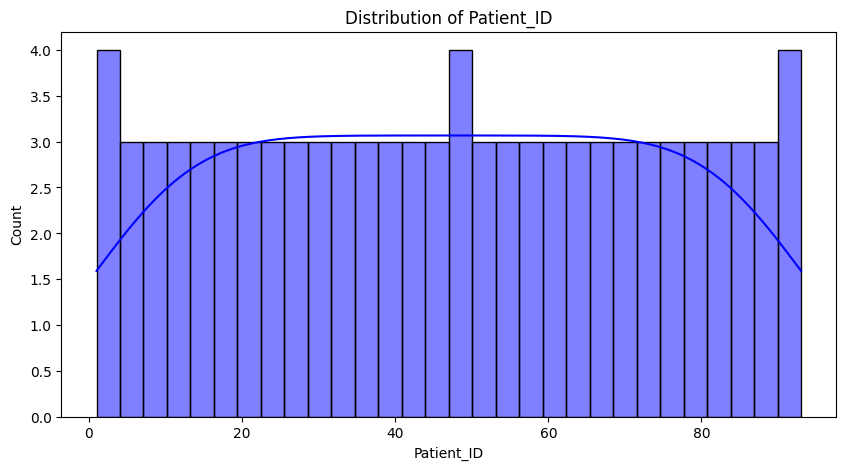

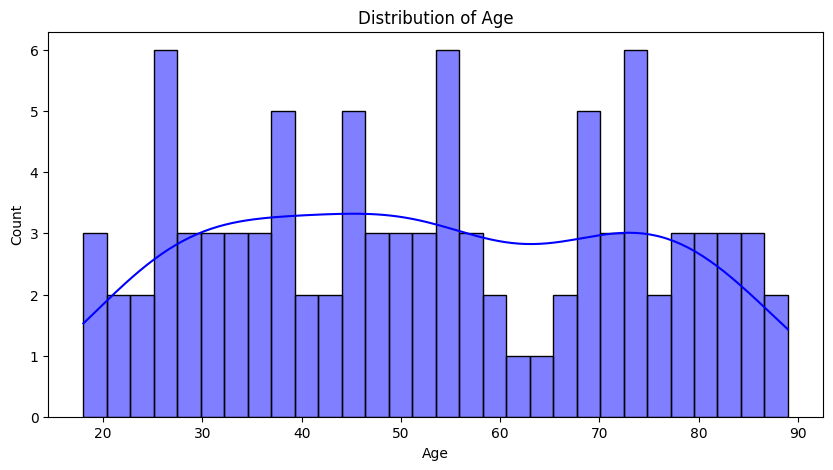

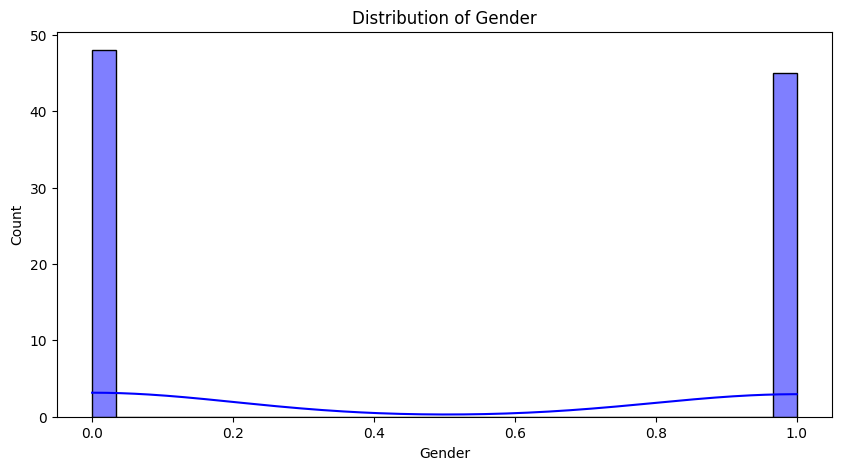

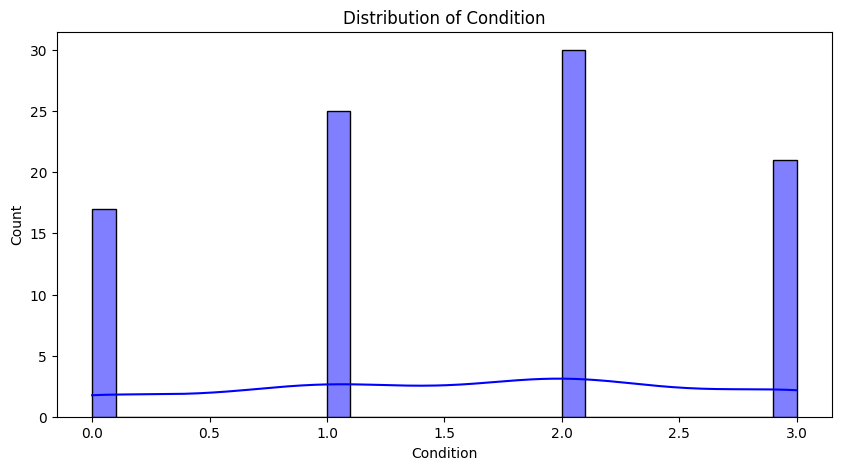

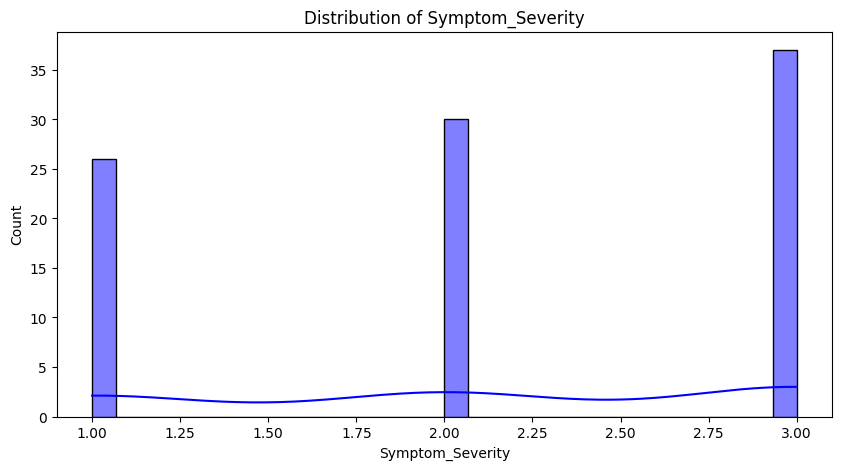

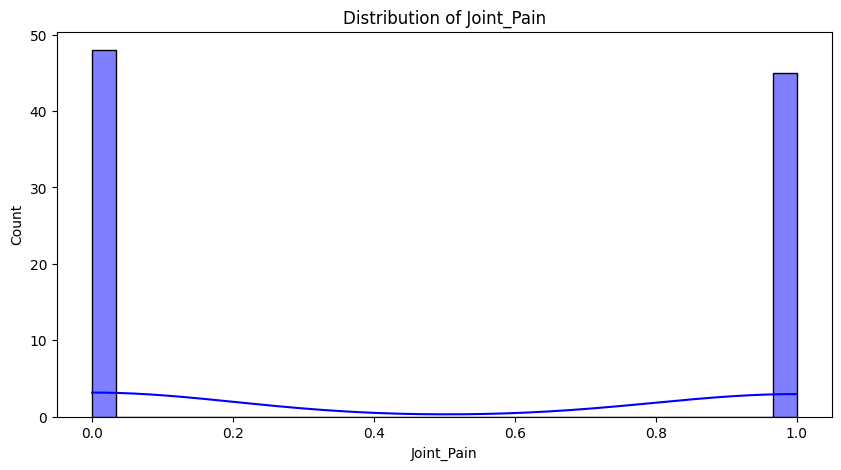

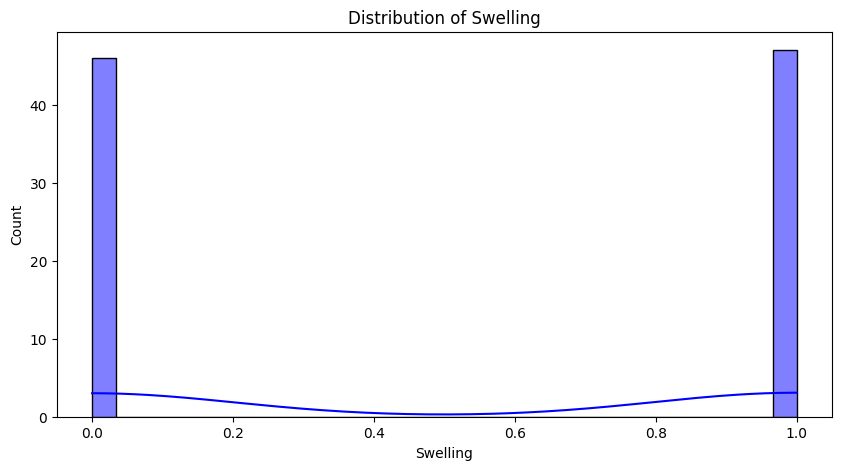

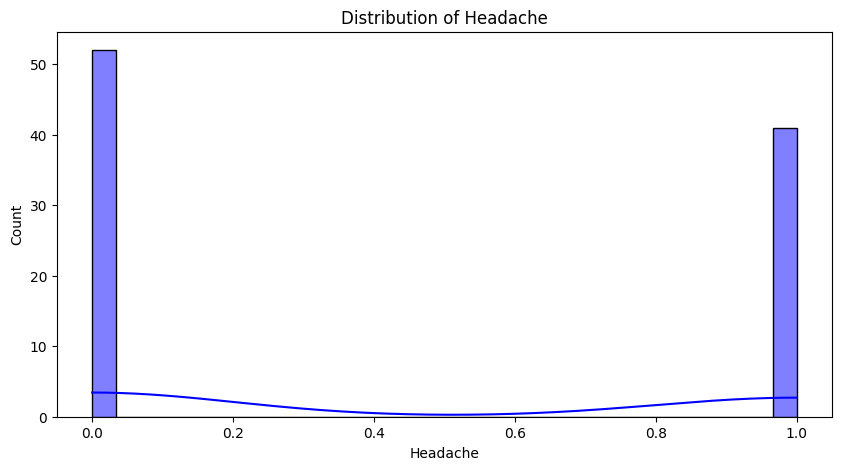

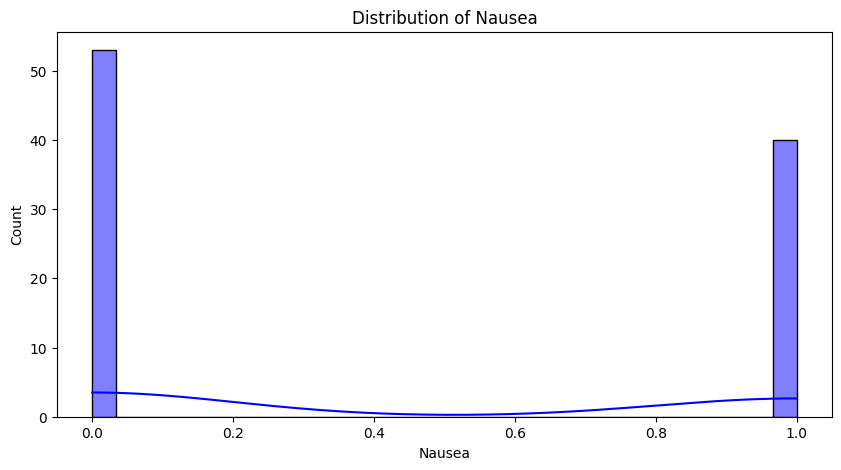

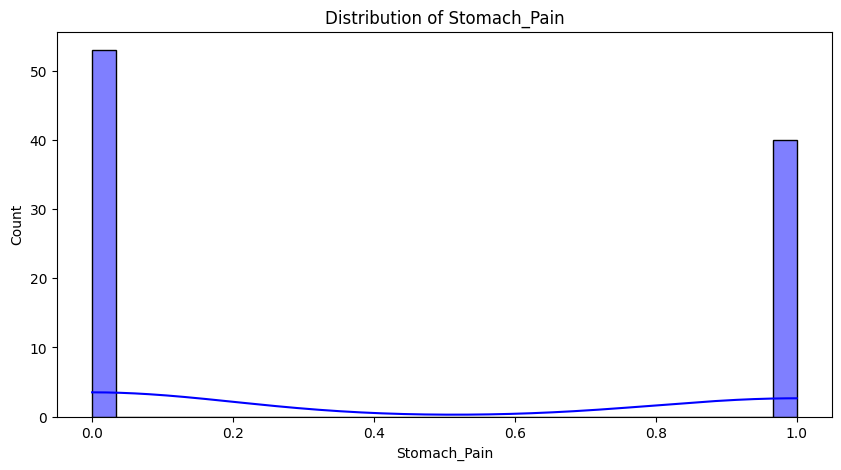

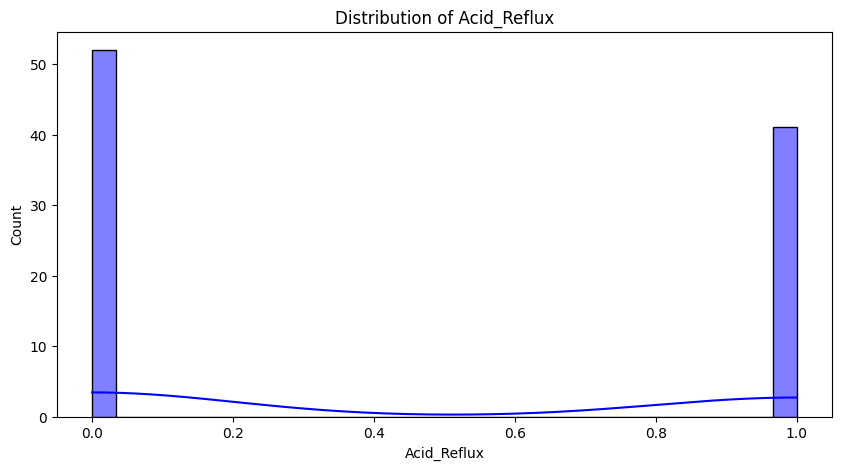

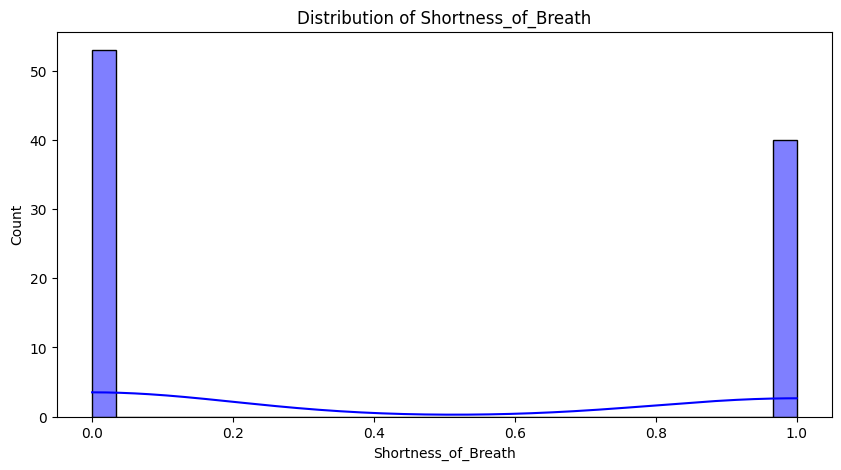

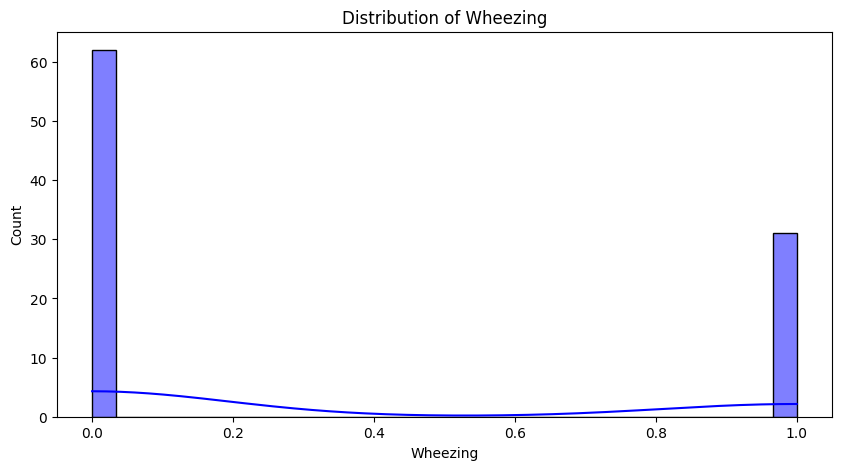

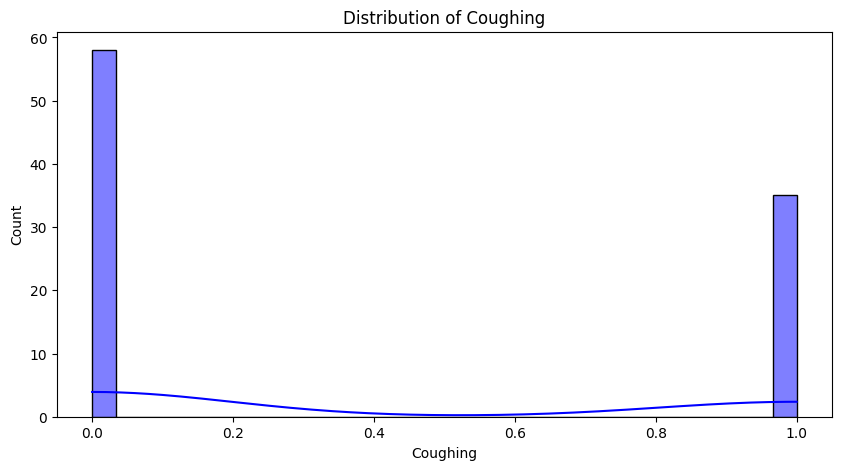

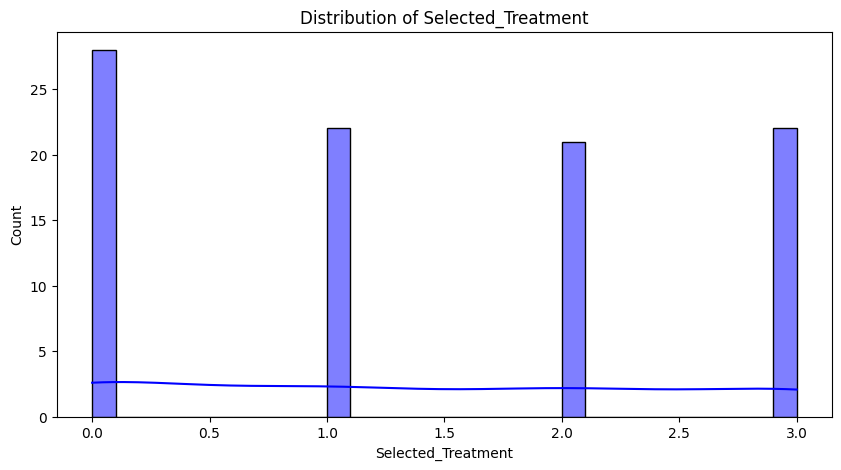

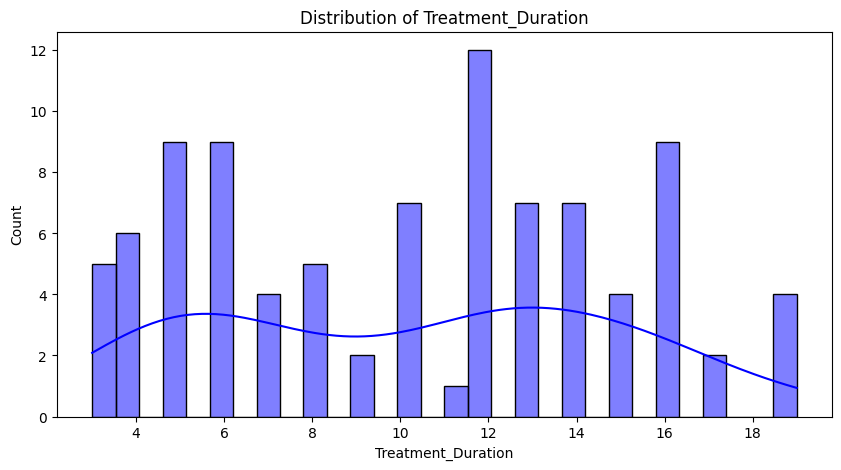

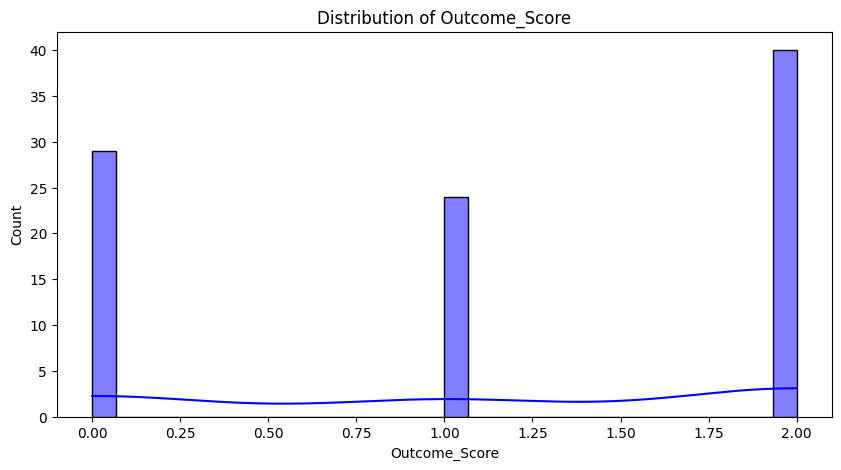

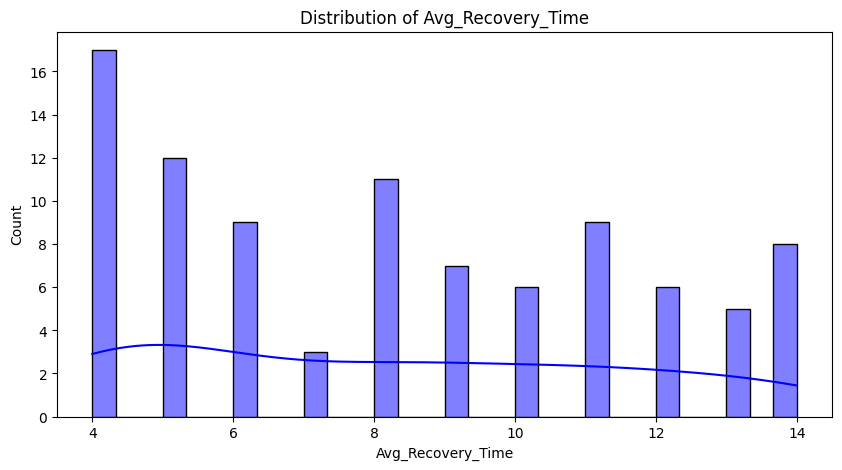

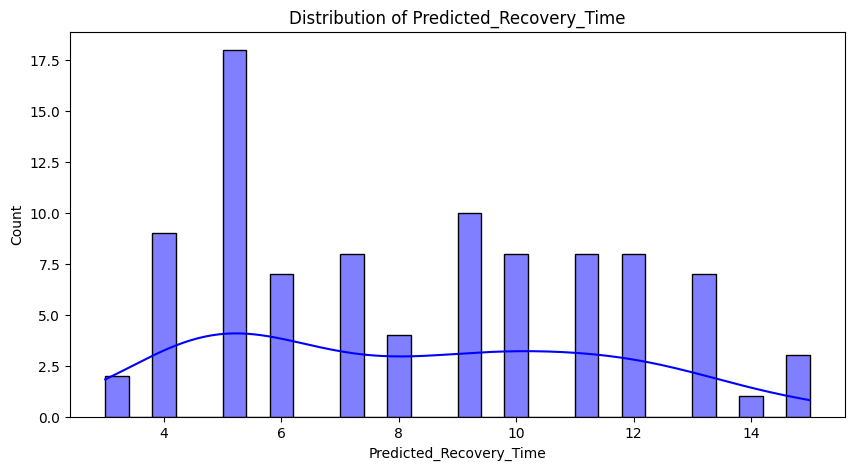

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nStatistical Summary:")
print(df.describe(include="all"))

# Visualize categorical and numerical features
categorical_columns = df.select_dtypes(include=["object"]).columns
numerical_columns = df.select_dtypes(include=["number"]).columns

# Plot categorical features
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette="viridis")
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Plot numerical features
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, kde=True, color="blue", bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


### **Step 3: Data Preprocessing**

In [ ]:
# Handling Missing Values
# Fill missing categorical values with mode
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill missing numerical values with median
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

# Encoding Categorical Variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature Scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Verify preprocessing
print("\nDataset After Preprocessing:")
print(df.head())



Dataset After Preprocessing:
   Patient_ID       Age    Gender  Condition  Symptom_Severity  Joint_Pain  \
0   -1.713526 -0.386207  1.032796  -1.546541          1.082514    1.032796   
1   -1.676275 -0.979063 -0.968246  -0.574728         -0.145215   -0.968246   
2   -1.639025  0.107840  1.032796   0.397085         -1.372945   -0.968246   
3   -1.601774 -1.176682  1.032796   1.368898          1.082514   -0.968246   
4   -1.564523 -0.583825 -0.968246  -1.546541         -0.145215    1.032796   

   Swelling  Headache    Nausea  Stomach_Pain  Acid_Reflux  \
0  0.989305 -0.887954 -0.868744     -0.868744    -0.887954   
1 -1.010811  1.126185  1.151086     -0.868744    -0.887954   
2 -1.010811 -0.887954 -0.868744      1.151086    -0.887954   
3 -1.010811 -0.887954 -0.868744     -0.868744    -0.887954   
4 -1.010811 -0.887954 -0.868744     -0.868744    -0.887954   

   Shortness_of_Breath  Wheezing  Coughing  Selected_Treatment  \
0            -0.868744 -0.707107 -0.776819           -1.219060

### **Step 4: Feature Selection**

In [ ]:
# Define the two target variables
target_1 = "Outcome_Score"
target_2 = "Predicted_Recovery_Time"

# Features (drop both targets and unwanted columns from the features set)
X = df.drop(columns=[target_1, target_2, "Patient_ID", "Avg_Recovery_Time"], errors='ignore')
y1 = df[target_1]  # Target 1
y2 = df[target_2]  # Target 2

# Feature Scaling using MinMaxScaler
scaler = MinMaxScaler()

# Update numerical_columns to exclude target variables and dropped columns
numerical_columns = [col for col in df.select_dtypes(include=["number"]).columns
                     if col not in [target_1, target_2, "Patient_ID", "Avg_Recovery_Time"]]

# Apply scaling to the updated numerical columns in X
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

# Feature Selection using f_regression and SelectKBest
# SelectKBest for Target 1: Outcome_Score
selector_y1 = SelectKBest(score_func=f_regression, k=5)  # Top 5 features for target 1
X_new_y1 = selector_y1.fit_transform(X, y1)
selected_features_y1 = X.columns[selector_y1.get_support()]

print("\nSelected Features for Outcome_Score (Target 1):")
print(selected_features_y1)

# SelectKBest for Target 2: Predicted_Recovery_Time
selector_y2 = SelectKBest(score_func=f_regression, k=5)  # Top 5 features for target 2
X_new_y2 = selector_y2.fit_transform(X, y2)
selected_features_y2 = X.columns[selector_y2.get_support()]

print("\nSelected Features for Predicted_Recovery_Time (Target 2):")
print(selected_features_y2)

# Combine Selected Features
selected_features_combined = list(set(selected_features_y1) | set(selected_features_y2))
print("\nCombined Selected Features for Both Targets:")
print(selected_features_combined)

# Filter the dataset to only include the selected features and the targets
X_selected = df[selected_features_combined]


Selected Features for Outcome_Score (Target 1):
Index(['Headache', 'Stomach_Pain', 'Shortness_of_Breath', 'Selected_Treatment',
       'Treatment_Duration'],
      dtype='object')

Selected Features for Predicted_Recovery_Time (Target 2):
Index(['Age', 'Acid_Reflux', 'Coughing', 'Selected_Treatment',
       'Treatment_Duration'],
      dtype='object')

Combined Selected Features for Both Targets:
['Age', 'Shortness_of_Breath', 'Selected_Treatment', 'Headache', 'Coughing', 'Acid_Reflux', 'Stomach_Pain', 'Treatment_Duration']


### **Step 5: Feature Extraction**

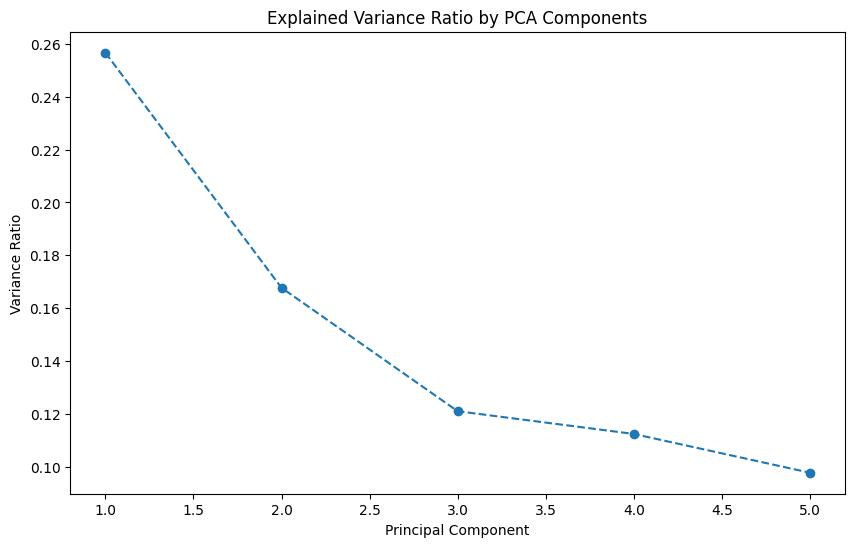


PCA Transformed Data (First 5 Rows):
          0         1         2         3         4
0 -1.401063 -0.681931 -1.127603 -1.169832  0.449955
1 -2.652057 -1.026933  0.491701  0.437053  0.671251
2 -2.572798  0.176484  0.032469 -0.477707 -0.802429
3 -1.797583  2.011956  0.645658 -0.076691 -0.076462
4 -1.585860 -0.652827 -1.191651 -0.972647  0.184302


In [ ]:
from sklearn.decomposition import PCA

# Apply PCA for feature extraction
# Use only the selected features from the previous step
X_selected = df[selected_features_combined]

# Standardize the features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Fit PCA to reduce to a smaller number of components
pca = PCA(n_components=5)  # Adjust 'n_components' based on variance requirements
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by PCA Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.show()

# PCA transformed data
print("\nPCA Transformed Data (First 5 Rows):")
print(pd.DataFrame(X_pca).head())


### **Step 6: Data Splitting for Multi-Target Modeling**

In [ ]:
from sklearn.model_selection import train_test_split

# Split data for the first target: Outcome_Score
X_train_y1, X_test_y1, y_train_y1, y_test_y1 = train_test_split(X_pca, y1, test_size=0.2, random_state=42)

# Split data for the second target: Predicted_Recovery_Time
X_train_y2, X_test_y2, y_train_y2, y_test_y2 = train_test_split(X_pca, y2, test_size=0.2, random_state=42)

# Display shapes of the splits
print("\nTraining and Testing Data Shapes:")
print(f"X_train_y1: {X_train_y1.shape}, y_train_y1: {y_train_y1.shape}")
print(f"X_train_y2: {X_train_y2.shape}, y_train_y2: {y_train_y2.shape}")



Training and Testing Data Shapes:
X_train_y1: (74, 5), y_train_y1: (74,)
X_train_y2: (74, 5), y_train_y2: (74,)


**Step 7: Model Training and Evaluation**

In [ ]:
from sklearn.ensemble import RandomForestRegressor # Import Regressor instead of Classifier
from sklearn.metrics import mean_squared_error, r2_score # Import appropriate metrics

# Train a Random Forest Regressor for Outcome_Score
rf_y1 = RandomForestRegressor(random_state=42) # Changed to Regressor
rf_y1.fit(X_train_y1, y_train_y1)

# Predict and Evaluate
y_pred_y1 = rf_y1.predict(X_test_y1)

print("\nEvaluation for Outcome_Score (Target 1):")
print("Mean Squared Error:", mean_squared_error(y_test_y1, y_pred_y1)) # Use regression metrics
print("R-squared:", r2_score(y_test_y1, y_pred_y1))


Evaluation for Outcome_Score (Target 1):
Mean Squared Error: 1.235994909048351
R-squared: -0.17682971014492765


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Refine binning strategy
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
y_train_y1_discretized = discretizer.fit_transform(y_train_y1.values.reshape(-1, 1))
y_test_y1_discretized = discretizer.transform(y_test_y1.values.reshape(-1, 1))

# Hyperparameter tuning for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_y1_class = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf_y1_class, param_grid, cv=3, scoring='accuracy')
grid_rf.fit(X_train_y1, y_train_y1_discretized.ravel())

# Best Model
best_rf_y1_class = grid_rf.best_estimator_
y_pred_y1_class = best_rf_y1_class.predict(X_test_y1)

# Evaluate
print("\nEvaluation for Outcome_Score (Refined Classification):")
print("Best Parameters:", grid_rf.best_params_)
print("Confusion Matrix:")
print(confusion_matrix(y_test_y1_discretized, y_pred_y1_class))
print("\nClassification Report:")
print(classification_report(y_test_y1_discretized, y_pred_y1_class))



Evaluation for Outcome_Score (Refined Classification):
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Confusion Matrix:
[[2 2 2]
 [2 0 2]
 [2 3 4]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.33      0.33      0.33         6
         1.0       0.00      0.00      0.00         4
         2.0       0.50      0.44      0.47         9

    accuracy                           0.32        19
   macro avg       0.28      0.26      0.27        19
weighted avg       0.34      0.32      0.33        19



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train a Random Forest Regressor for Predicted_Recovery_Time
rf_y2 = RandomForestRegressor(random_state=42)
rf_y2.fit(X_train_y2, y_train_y2)

# Predict and Evaluate
y_pred_y2 = rf_y2.predict(X_test_y2)

print("\nEvaluation for Predicted_Recovery_Time (Target 2):")
print(f"Mean Squared Error: {mean_squared_error(y_test_y2, y_pred_y2):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_y2, y_pred_y2):.2f}")
print(f"R2 Score: {r2_score(y_test_y2, y_pred_y2):.2f}")



Evaluation for Predicted_Recovery_Time (Target 2):
Mean Squared Error: 0.69
Mean Absolute Error: 0.65
R2 Score: 0.39


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Hyperparameter tuning for GradientBoostingRegressor
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gb_y2 = GradientBoostingRegressor(random_state=42)
grid_gb = GridSearchCV(gb_y2, param_grid_gb, cv=3, scoring='r2')
grid_gb.fit(X_train_y2, y_train_y2)

# Best Model
best_gb_y2 = grid_gb.best_estimator_
y_pred_y2_gb = best_gb_y2.predict(X_test_y2)

# Evaluate
print("\nEvaluation for Predicted_Recovery_Time (Tuned Gradient Boosting):")
print("Best Parameters:", grid_gb.best_params_)
print(f"Mean Squared Error: {mean_squared_error(y_test_y2, y_pred_y2_gb):.2f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_y2, y_pred_y2_gb):.2f}")
print(f"R2 Score: {r2_score(y_test_y2, y_pred_y2_gb):.2f}")



Evaluation for Predicted_Recovery_Time (Tuned Gradient Boosting):
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Mean Squared Error: 0.66
Mean Absolute Error: 0.68
R2 Score: 0.42


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial and interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_y1)
X_test_poly = poly.transform(X_test_y1)

# Use these features for modeling Outcome_Score
rf_y1_class_poly = RandomForestClassifier(random_state=42)
rf_y1_class_poly.fit(X_train_poly, y_train_y1_discretized.ravel())

y_pred_y1_class_poly = rf_y1_class_poly.predict(X_test_poly)

# Evaluate
print("\nEvaluation for Outcome_Score (With Polynomial Features):")
print("Confusion Matrix:")
print(confusion_matrix(y_test_y1_discretized, y_pred_y1_class_poly))
print("\nClassification Report:")
print(classification_report(y_test_y1_discretized, y_pred_y1_class_poly))



Evaluation for Outcome_Score (With Polynomial Features):
Confusion Matrix:
[[1 3 2]
 [1 1 2]
 [1 3 5]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.33      0.17      0.22         6
         1.0       0.14      0.25      0.18         4
         2.0       0.56      0.56      0.56         9

    accuracy                           0.37        19
   macro avg       0.34      0.32      0.32        19
weighted avg       0.40      0.37      0.37        19



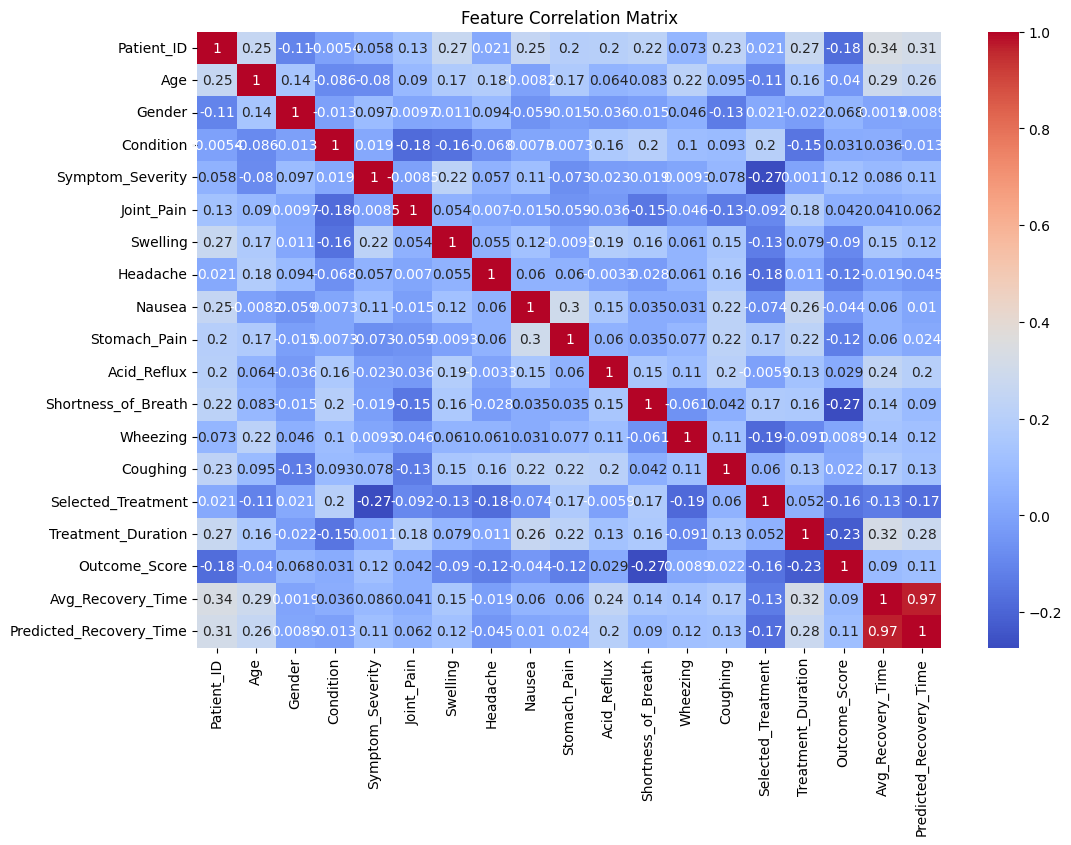


Correlation with Outcome_Score:
Outcome_Score              1.000000
Symptom_Severity           0.119124
Predicted_Recovery_Time    0.113739
Avg_Recovery_Time          0.090114
Gender                     0.067521
Joint_Pain                 0.042302
Condition                  0.030553
Acid_Reflux                0.029205
Coughing                   0.022377
Wheezing                   0.008912
Age                       -0.040465
Nausea                    -0.044068
Swelling                  -0.089716
Stomach_Pain              -0.120435
Headache                  -0.123098
Selected_Treatment        -0.158009
Patient_ID                -0.176048
Treatment_Duration        -0.227181
Shortness_of_Breath       -0.273168
Name: Outcome_Score, dtype: float64

Correlation with Predicted_Recovery_Time:
Predicted_Recovery_Time    1.000000
Avg_Recovery_Time          0.965780
Patient_ID                 0.309254
Treatment_Duration         0.278638
Age                        0.257351
Acid_Reflux             

In [ ]:
# Correlation Matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

# Check correlation with each target
print("\nCorrelation with Outcome_Score:")
print(correlation_matrix[target_1].sort_values(ascending=False))

print("\nCorrelation with Predicted_Recovery_Time:")
print(correlation_matrix[target_2].sort_values(ascending=False))


**Step 8: Feature Importance Analysis**

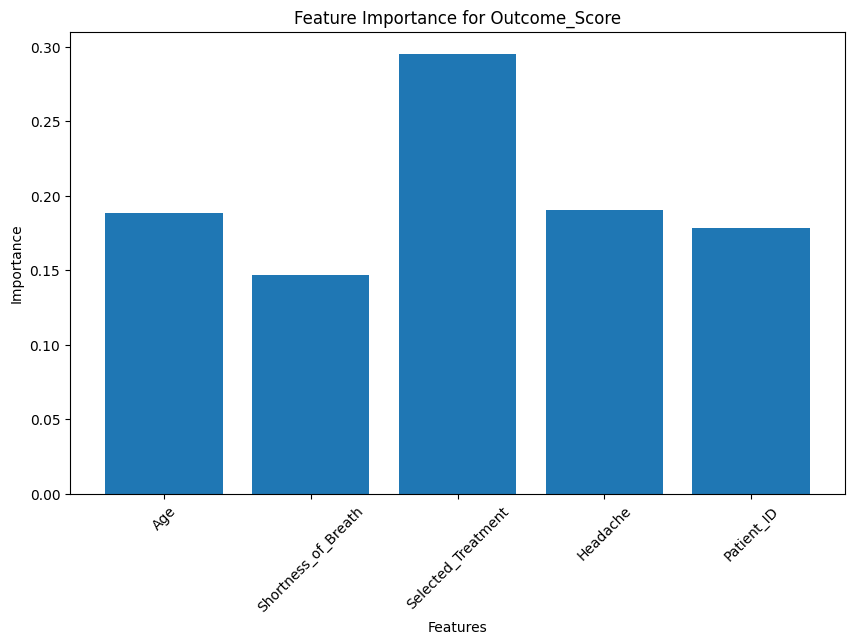

In [ ]:
# Feature importance for Outcome_Score
importance_y1 = rf_y1.feature_importances_
# Get the feature names from the model if available, or use a subset of selected_features_combined
feature_names = rf_y1.feature_names_in_ if hasattr(rf_y1, 'feature_names_in_') else selected_features_combined[:len(importance_y1)]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importance_y1)), importance_y1, tick_label=feature_names)  # Use feature_names or a subset
plt.title("Feature Importance for Outcome_Score")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

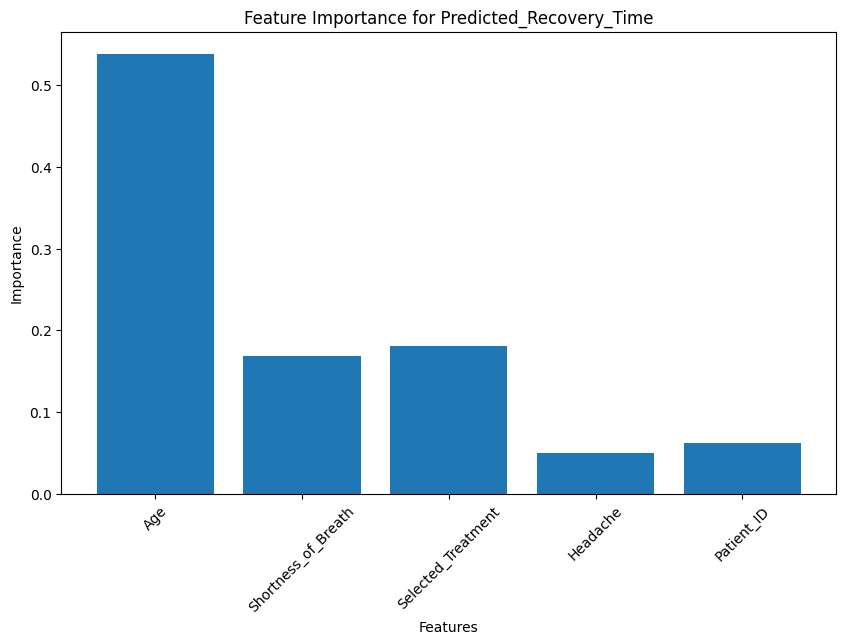

In [ ]:
# Feature importance for Predicted_Recovery_Time
importance_y2 = rf_y2.feature_importances_

# Ensure feature_names_y2 matches the length of importance_y2
# by taking a subset of selected_features_combined
feature_names_y2 = selected_features_combined[:len(importance_y2)]

plt.figure(figsize=(10, 6))

# Use feature_names_y2 for tick labels
plt.bar(range(len(feature_names_y2)), importance_y2, tick_label=feature_names_y2)

plt.title("Feature Importance for Predicted_Recovery_Time")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

**Updated Code for Feature Engineering**

In [ ]:
# Drop redundant and low-impact features based on correlation analysis
df = df.drop(columns=["Patient_ID", "Avg_Recovery_Time"])  # Drop Patient_ID and Avg_Recovery_Time


In [ ]:
# Keep features with meaningful correlation or importance
selected_features = ["Age", "Treatment_Duration", "Swelling", "Coughing", "Selected_Treatment"]

import pandas as pd

# Convert the NumPy arrays to Pandas DataFrames
X_train_y1 = pd.DataFrame(X_train_y1, columns=selected_features)
X_test_y1 = pd.DataFrame(X_test_y1, columns=selected_features)
X_train_y2 = pd.DataFrame(X_train_y2, columns=selected_features)
X_test_y2 = pd.DataFrame(X_test_y2, columns=selected_features)

# Now you can use .loc[] for filtering
X_train_y1 = X_train_y1.loc[:, selected_features]
X_test_y1 = X_test_y1.loc[:, selected_features]
X_train_y2 = X_train_y2.loc[:, selected_features]
X_test_y2 = X_test_y2.loc[:, selected_features]

In [ ]:
# Retrain the models with selected features

# Outcome_Score (RandomForestRegressor)
rf_y1 = RandomForestRegressor(random_state=42)
rf_y1.fit(X_train_y1, y_train_y1)

y_pred_y1 = rf_y1.predict(X_test_y1)
print("\nUpdated Evaluation for Outcome_Score:")
print(f"Mean Squared Error: {mean_squared_error(y_test_y1, y_pred_y1):.2f}")
print(f"R2 Score: {r2_score(y_test_y1, y_pred_y1):.2f}")

# Predicted_Recovery_Time (GradientBoostingRegressor)
gb_y2 = GradientBoostingRegressor(random_state=42)
gb_y2.fit(X_train_y2, y_train_y2)

y_pred_y2 = gb_y2.predict(X_test_y2)
print("\nUpdated Evaluation for Predicted_Recovery_Time:")
print(f"Mean Squared Error: {mean_squared_error(y_test_y2, y_pred_y2):.2f}")
print(f"R2 Score: {r2_score(y_test_y2, y_pred_y2):.2f}")



Updated Evaluation for Outcome_Score:
Mean Squared Error: 1.24
R2 Score: -0.18

Updated Evaluation for Predicted_Recovery_Time:
Mean Squared Error: 0.68
R2 Score: 0.40


* Voting Regressor (Combining Multiple Models)*

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression

# Initialize base models
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
lr = LinearRegression()

# Create a Voting Regressor
voting_regressor = VotingRegressor(estimators=[('rf', rf), ('gb', gb), ('lr', lr)])

# Train the ensemble model for Outcome_Score (y1)
voting_regressor.fit(X_train_y1, y_train_y1)

# Predict and Evaluate
y_pred_y1_voting = voting_regressor.predict(X_test_y1)
print(f"Voting Regressor Mean Squared Error: {mean_squared_error(y_test_y1, y_pred_y1_voting):.2f}")
print(f"Voting Regressor R2 Score: {r2_score(y_test_y1, y_pred_y1_voting):.2f}")


Voting Regressor Mean Squared Error: 1.10
Voting Regressor R2 Score: -0.05


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Assuming you have a dataset with features 'X' and target 'y'
# Replace 'X' and 'y' with your actual dataset features and target variables

# Example data
# X = your_features_dataframe  # You already have this defined
y = X['Outcome_Score']  # Assuming 'Outcome_Score' is your target variable column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest model
rf = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]  # Correct max_features values
}

# Perform Grid Search with 3-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the model on the test data
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Calculate and print the model performance on the test set
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test Set Mean Squared Error: {mse}")
print(f"Test Set R² Score: {r2}")

KeyError: 'Outcome_Score'

**Step 9: Save Processed Data and Models**

In [ ]:
import pickle

# Save PCA-transformed data
processed_data = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
processed_data[target_1] = y1.values
processed_data[target_2] = y2.values
processed_data.to_csv("processed_dataset.csv", index=False)

# Save trained models
with open("rf_model_y1.pkl", "wb") as f:
    pickle.dump(rf_y1, f)

with open("rf_model_y2.pkl", "wb") as f:
    pickle.dump(rf_y2, f)

print("\nData and models have been saved!")



Data and models have been saved!
